# Filtered Boston Housing

In [26]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [27]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn            #ignore annoying warning

## Question 4

In [28]:
#import the data
df = pd.read_csv('http://www.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Computing Training and Test Errors

In [29]:
#function to split the dataset into training and test sets
def train_test_split(df, n_train):
    values = df.values                        
    np.random.shuffle(values)                 #shuffle the data to make it random
    df_train = pd.DataFrame(values[:n_train], columns=df.columns)       #obtain the training set
    df_test = pd.DataFrame(values[n_train:], columns=df.columns)        #obtain the test set
    return df_train, df_test

In [30]:
#function to evaluate models
def evaluate_model(df, model, n):
    '''
    df: the data to be splited into training and test sets
    model: the model used to make predictions
    n: the number fo runs to perform
    '''
    MSE_train, MSE_test = [], []
    n_train = int(len(df)*2/3)                                #define the number of training data
    for i in range(n):
        df_train, df_test = train_test_split(df, n_train)     #obtain the training and test sets
        MSE = model(df_train, df_test)            
        MSE_train.append(MSE[0])
        MSE_test.append(MSE[1])
    return [np.mean(MSE_train), np.mean(MSE_test)], [np.std(MSE_train), np.std(MSE_test)]

In [31]:
np.random.seed(0)

## Naive Regression: mean y-value

In [32]:
def naive_regression(df_train, df_test):
    y_train = df_train['MEDV']
    y_test = df_test['MEDV']
    feature = y_train.mean()                          #use the mean y-value of the training data as the only feature
    ones_train = np.ones(shape=len(df_train))         #create a vector of ones with size equal to the training set
    ones_test = np.ones(shape=len(df_test))           #create a vector of ones with size equal to the test set
    y_pred_train = feature*ones_train                 #make predictions using on the training data
    y_pred_test = feature*ones_test                   #make predictions using on the test data           
    MSE_train = np.mean((y_pred_train - y_train)**2)  #compute the training error
    MSE_test = np.mean((y_pred_test - y_test)**2)     #compute the test error
    return [MSE_train, MSE_test]

In [33]:
evaluate_model(df, naive_regression, 20)

([84.11766709225228, 85.28986264279239],
 [5.515235279630651, 10.858148273396658])

## Linear Regression: a single feature + a bias term

In [34]:
def linear_regression(df_train, df_test):
    #add the bias term to the training and test datasets
    df_train['bias'] = np.ones(shape=len(df_train))
    df_test['bias'] = np.ones(shape=len(df_test))
    #obtain the features including the bias term
    features = list(df_train.columns)
    features.remove('MEDV')
    #obtain the training and test values
    X_train, y_train = df_train[features].values, df_train[['MEDV']].values
    X_test, y_test = df_test[features].values, df_test[['MEDV']].values
    #use the normal equation to compute the weights
    w = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
    #make predictions
    y_pred_train = np.dot(X_train, w)
    y_pred_test = np.dot(X_test, w)
    #compute the training and test errors
    MSE_train = np.mean((y_pred_train - y_train)**2) 
    MSE_test = np.mean((y_pred_test - y_test)**2)   
    return [MSE_train, MSE_test]

In [35]:
for feature in df.columns[:-1]:
    df_sub = df[[feature,'MEDV']].copy()
    MSE = evaluate_model(df_sub, linear_regression, 20)
    print(feature, ': ', MSE)

CRIM :  ([70.82027902616657, 74.36368660841327], [4.427283890948871, 8.995907189079073])
 ZN  :  ([71.96865254462622, 76.75674063659756], [4.044654490529215, 8.051132557810549])
INDUS  :  ([65.31261027502433, 63.76977822527001], [4.653609573725449, 9.396461903448756])
CHAS :  ([81.35576658057428, 83.20066514059664], [5.666918262784081, 11.411260321582336])
NOX :  ([69.26961562530538, 68.79068878313225], [4.757373417623581, 9.49668282131437])
RM :  ([44.16678789334372, 43.020520623943426], [4.041815231298285, 8.101302174706092])
AGE :  ([71.0996583967973, 75.54005034536699], [4.950714268329612, 10.039824267993795])
DIS :  ([79.76834758290087, 78.23432408517081], [4.2172390940454525, 8.328675436505186])
RAD :  ([72.9422072428918, 71.0397702306088], [5.181108174907842, 10.42572127366888])
TAX :  ([66.057081530256, 65.95092087817666], [3.3503877111562654, 6.768674063070069])
PTRATIO :  ([62.053597223300265, 64.30679321418303], [4.69524807314924, 9.495581294874345])
LSTAT :  ([37.9839745988

## Linear Regression: all features + a bias term

In [36]:
evaluate_model(df, linear_regression, 20)

([21.663333135195224, 25.503010768141547],
 [2.4990010221168166, 5.4032158094502325])

## Kernelised Ridge Regression

In [37]:
#function to perform gaussian kernelisation
def gaussian_kernel(x_i, x_j, sigma):
    return np.exp(-np.linalg.norm(x_i - x_j)**2/(2*sigma**2))

#function to compute the K matrix
def compute_K(X_train, sigma):
    l = len(X_train)                                                    #size of the input data
    K = np.zeros(shape=(l,l))                                           #initialize the K matrix
    for i in range(l):
        for j in range(l):
            K[i][j] = gaussian_kernel(X_train[i], X_train[j], sigma)    #compute the elements of the K matrix
    return K

#function to compute the optimal alpha
def compute_alpha(X_train, sigma, gamma, y_train):
    l = len(X_train)                                      #size of the input data
    K = compute_K(X_train, sigma)                         #kernalise the input data 
    I = np.identity(l)                                    #obtain the identity matrix
    alpha = np.linalg.inv(K + gamma*l*I).dot(y_train)     #solve the dual optimisation problem
    return alpha

#function to make predictions based on the given sigma and gamma values
def predict(X_train, X_test, sigma, gamma, y_train):
    alpha = compute_alpha(X_train, sigma, gamma, y_train)    
    y_pred = []
    for j in range(len(X_test)):
        y_pred_j = 0
        for i in range(len(X_train)):
            y_pred_j += alpha[i] * gaussian_kernel(X_train[i], X_test[j], sigma)
        y_pred.append(y_pred_j)
    return np.array(y_pred)

#function to compute the MSE
def compute_MSE(X_train, X_test, y_train, y_test, sigma, gamma):
    y_pred = predict(X_train, X_test, sigma, gamma, y_train)
    return np.mean((y_pred - y_test)**2)

#function to find the best sigma and gamma values with cross-validation
def cv_tunning(sigma_list, gamma_list, df_train, k=5):
    n_train = int(len(df_train)*2/3)                                #define the number of training data
    features = list(df_train.columns)
    features.remove('MEDV')
    MSE_list, sigma_best, gamma_best = [], 0, 0
    for sigma in tqdm(sigma_list):
        for gamma in gamma_list:
            MSE_cv = []
            for _ in range(k):    #k-fold cross-validation
                #split the data
                df_train_cv, df_test_cv = train_test_split(df_train, n_train)
                X_train_cv, y_train_cv = df_train_cv[features].values, df_train_cv[['MEDV']].values
                X_test_cv, y_test_cv = df_test_cv[features].values, df_test_cv[['MEDV']].values
                #compute the MSE
                MSE = compute_MSE(X_train_cv, X_test_cv, y_train_cv, y_test_cv, sigma, gamma)
                MSE_cv.append(MSE)
            #print('sigma =', sigma, ', gamma =', gamma, ', MSE =', np.mean(MSE_cv))
            MSE_min = min(MSE_list) if MSE_list else np.mean(MSE_cv)  #the minimum MSE of the previous combinations
            if np.mean(MSE_cv) <= MSE_min:          #if the current sigma and gamma values give a lower averaged test MSE
                sigma_best, gamma_best = sigma, gamma
            MSE_list.append(np.mean(MSE_cv))
    return sigma_best, gamma_best, MSE_list

#function to implement the kernelised ridge regression model
def kernelised_ridge_regression(df_train, df_test):
    #create the vectors gamma and sigma
    gamma_list = np.array([2**(-i) for i in range(26,41)][::-1])
    sigma_list = np.array([2**(i) for i in np.arange(7,13.5,0.5)])
    #obtain the training and test sets
    features = list(df_train.columns)
    features.remove('MEDV')
    X_train, y_train = df_train[features].values, df_train[['MEDV']].values
    X_test, y_test = df_test[features].values, df_test[['MEDV']].values
    #compute the best sigma and gamma value
    sigma_best, gamma_best, _ = cv_tunning(sigma_list, gamma_list, df_train, k=5)
    #compute the training and test errors
    MSE_train = compute_MSE(X_train, X_train, y_train, y_train, sigma_best, gamma_best)
    MSE_test = compute_MSE(X_train, X_test, y_train, y_test, sigma_best, gamma_best)
    return [MSE_train, MSE_test]

### Question 5.a

In [38]:
#generate the training and test sets for question 5.a and 5.b
n_train = int(len(df)*2/3) 
df_train, df_test = train_test_split(df, n_train)

In [39]:
#visualize the tuning process
#to do so, the print line in the cv_tunning function need to be uncommented
gamma_list = np.array([2**(-i) for i in range(26,41)][::-1])
sigma_list = np.array([2**(i) for i in np.arange(7,13.5,0.5)])
sigma_best, gamma_best, MSE_list = cv_tunning(sigma_list, gamma_list, df_train, k=5)

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

sigma =  128.0 gamma =  9.094947017729282e-13 MSE =  2778.103727760737
sigma =  128.0 gamma =  1.8189894035458565e-12 MSE =  1923.547611510839
sigma =  128.0 gamma =  3.637978807091713e-12 MSE =  1382.8585158867331
sigma =  128.0 gamma =  7.275957614183426e-12 MSE =  2559.3115774268726
sigma =  128.0 gamma =  1.4551915228366852e-11 MSE =  1369.8285668186097
sigma =  128.0 gamma =  2.9103830456733704e-11 MSE =  616.3585586741225
sigma =  128.0 gamma =  5.820766091346741e-11 MSE =  251.7089827258203
sigma =  128.0 gamma =  1.1641532182693481e-10 MSE =  182.4947192983767
sigma =  128.0 gamma =  2.3283064365386963e-10 MSE =  218.8090840264353
sigma =  128.0 gamma =  4.656612873077393e-10 MSE =  287.0407690307899
sigma =  128.0 gamma =  9.313225746154785e-10 MSE =  47.400393562475934
sigma =  128.0 gamma =  1.862645149230957e-09 MSE =  79.60236715185425
sigma =  128.0 gamma =  3.725290298461914e-09 MSE =  79.15896220944038
sigma =  128.0 gamma =  7.450580596923828e-09 MSE =  93.956265199760

  8%|██████▍                                                                            | 1/13 [00:56<11:18, 56.56s/it]

sigma =  128.0 gamma =  1.4901161193847656e-08 MSE =  27.370247565850473
sigma =  181.01933598375618 gamma =  9.094947017729282e-13 MSE =  1197.9823556542683
sigma =  181.01933598375618 gamma =  1.8189894035458565e-12 MSE =  561.2359342565552
sigma =  181.01933598375618 gamma =  3.637978807091713e-12 MSE =  1126.8077767851948
sigma =  181.01933598375618 gamma =  7.275957614183426e-12 MSE =  680.5129766945646
sigma =  181.01933598375618 gamma =  1.4551915228366852e-11 MSE =  872.3002486306489
sigma =  181.01933598375618 gamma =  2.9103830456733704e-11 MSE =  265.7770347115709
sigma =  181.01933598375618 gamma =  5.820766091346741e-11 MSE =  406.5193159893678
sigma =  181.01933598375618 gamma =  1.1641532182693481e-10 MSE =  234.11814415437925
sigma =  181.01933598375618 gamma =  2.3283064365386963e-10 MSE =  188.2691507620395
sigma =  181.01933598375618 gamma =  4.656612873077393e-10 MSE =  50.68255376487211
sigma =  181.01933598375618 gamma =  9.313225746154785e-10 MSE =  59.8284078767

 15%|████████████▊                                                                      | 2/13 [01:56<10:41, 58.34s/it]

sigma =  181.01933598375618 gamma =  1.4901161193847656e-08 MSE =  17.13668404337188
sigma =  256.0 gamma =  9.094947017729282e-13 MSE =  13673.507806636271
sigma =  256.0 gamma =  1.8189894035458565e-12 MSE =  527.0267200142762
sigma =  256.0 gamma =  3.637978807091713e-12 MSE =  2854.0235053139672
sigma =  256.0 gamma =  7.275957614183426e-12 MSE =  2179.760172690616
sigma =  256.0 gamma =  1.4551915228366852e-11 MSE =  978.756854208832
sigma =  256.0 gamma =  2.9103830456733704e-11 MSE =  34.655817678902466
sigma =  256.0 gamma =  5.820766091346741e-11 MSE =  261.4625411622119
sigma =  256.0 gamma =  1.1641532182693481e-10 MSE =  47.40043700596327
sigma =  256.0 gamma =  2.3283064365386963e-10 MSE =  50.449136695037865
sigma =  256.0 gamma =  4.656612873077393e-10 MSE =  45.72934440158808
sigma =  256.0 gamma =  9.313225746154785e-10 MSE =  42.41931100977704
sigma =  256.0 gamma =  1.862645149230957e-09 MSE =  39.37066776306129
sigma =  256.0 gamma =  3.725290298461914e-09 MSE =  14

 23%|███████████████████▏                                                               | 3/13 [02:56<09:53, 59.40s/it]

sigma =  256.0 gamma =  1.4901161193847656e-08 MSE =  21.159605813895844
sigma =  362.03867196751236 gamma =  9.094947017729282e-13 MSE =  3310.4288882655737
sigma =  362.03867196751236 gamma =  1.8189894035458565e-12 MSE =  155.54813478499509
sigma =  362.03867196751236 gamma =  3.637978807091713e-12 MSE =  476.7063019766024
sigma =  362.03867196751236 gamma =  7.275957614183426e-12 MSE =  1931.689522984685
sigma =  362.03867196751236 gamma =  1.4551915228366852e-11 MSE =  446.4265171082599
sigma =  362.03867196751236 gamma =  2.9103830456733704e-11 MSE =  310.41060939203925
sigma =  362.03867196751236 gamma =  5.820766091346741e-11 MSE =  77.88732278532798
sigma =  362.03867196751236 gamma =  1.1641532182693481e-10 MSE =  25.099219461499786
sigma =  362.03867196751236 gamma =  2.3283064365386963e-10 MSE =  46.09073989591942
sigma =  362.03867196751236 gamma =  4.656612873077393e-10 MSE =  28.069054902739584
sigma =  362.03867196751236 gamma =  9.313225746154785e-10 MSE =  20.84353241

 31%|█████████████████████████▌                                                         | 4/13 [03:53<08:46, 58.50s/it]

sigma =  362.03867196751236 gamma =  1.4901161193847656e-08 MSE =  20.463011794673044
sigma =  512.0 gamma =  9.094947017729282e-13 MSE =  64.06846819195842
sigma =  512.0 gamma =  1.8189894035458565e-12 MSE =  1559.6196462822722
sigma =  512.0 gamma =  3.637978807091713e-12 MSE =  155.64865109855623
sigma =  512.0 gamma =  7.275957614183426e-12 MSE =  242.28824702441244
sigma =  512.0 gamma =  1.4551915228366852e-11 MSE =  62.968066693028405
sigma =  512.0 gamma =  2.9103830456733704e-11 MSE =  113.66674192440821
sigma =  512.0 gamma =  5.820766091346741e-11 MSE =  33.062128746922916
sigma =  512.0 gamma =  1.1641532182693481e-10 MSE =  34.810459552362055
sigma =  512.0 gamma =  2.3283064365386963e-10 MSE =  16.83568833217308
sigma =  512.0 gamma =  4.656612873077393e-10 MSE =  20.40418176396195
sigma =  512.0 gamma =  9.313225746154785e-10 MSE =  16.088172781594682
sigma =  512.0 gamma =  1.862645149230957e-09 MSE =  22.883856880114944
sigma =  512.0 gamma =  3.725290298461914e-09 MS

 38%|███████████████████████████████▉                                                   | 5/13 [04:54<07:55, 59.38s/it]

sigma =  512.0 gamma =  1.4901161193847656e-08 MSE =  13.92921881302073
sigma =  724.0773439350247 gamma =  9.094947017729282e-13 MSE =  27.857732902611225
sigma =  724.0773439350247 gamma =  1.8189894035458565e-12 MSE =  329.6421566537385
sigma =  724.0773439350247 gamma =  3.637978807091713e-12 MSE =  82.87295732110269
sigma =  724.0773439350247 gamma =  7.275957614183426e-12 MSE =  24.8246028860513
sigma =  724.0773439350247 gamma =  1.4551915228366852e-11 MSE =  12.38331015442031
sigma =  724.0773439350247 gamma =  2.9103830456733704e-11 MSE =  17.533671214038172
sigma =  724.0773439350247 gamma =  5.820766091346741e-11 MSE =  16.508315500770532
sigma =  724.0773439350247 gamma =  1.1641532182693481e-10 MSE =  23.21122305108296
sigma =  724.0773439350247 gamma =  2.3283064365386963e-10 MSE =  54.429374326646645
sigma =  724.0773439350247 gamma =  4.656612873077393e-10 MSE =  32.75828738803101
sigma =  724.0773439350247 gamma =  9.313225746154785e-10 MSE =  21.03580323495754
sigma =

 46%|██████████████████████████████████████▎                                            | 6/13 [05:55<06:57, 59.65s/it]

sigma =  724.0773439350247 gamma =  1.4901161193847656e-08 MSE =  16.475920051710638
sigma =  1024.0 gamma =  9.094947017729282e-13 MSE =  66.95697907788185
sigma =  1024.0 gamma =  1.8189894035458565e-12 MSE =  17.68305789989944
sigma =  1024.0 gamma =  3.637978807091713e-12 MSE =  23.713765574842174
sigma =  1024.0 gamma =  7.275957614183426e-12 MSE =  27.874523144116814
sigma =  1024.0 gamma =  1.4551915228366852e-11 MSE =  14.10241871262564
sigma =  1024.0 gamma =  2.9103830456733704e-11 MSE =  50.06864636010597
sigma =  1024.0 gamma =  5.820766091346741e-11 MSE =  14.44296287253537
sigma =  1024.0 gamma =  1.1641532182693481e-10 MSE =  12.684130501570333
sigma =  1024.0 gamma =  2.3283064365386963e-10 MSE =  17.693349124611405
sigma =  1024.0 gamma =  4.656612873077393e-10 MSE =  17.29680568907486
sigma =  1024.0 gamma =  9.313225746154785e-10 MSE =  20.251078281887896
sigma =  1024.0 gamma =  1.862645149230957e-09 MSE =  23.637702888057653
sigma =  1024.0 gamma =  3.7252902984619

 54%|████████████████████████████████████████████▋                                      | 7/13 [06:49<05:47, 57.89s/it]

sigma =  1024.0 gamma =  1.4901161193847656e-08 MSE =  22.60270520259599
sigma =  1448.1546878700494 gamma =  9.094947017729282e-13 MSE =  55.26485595043549
sigma =  1448.1546878700494 gamma =  1.8189894035458565e-12 MSE =  30.55879347839715
sigma =  1448.1546878700494 gamma =  3.637978807091713e-12 MSE =  39.71068441804803
sigma =  1448.1546878700494 gamma =  7.275957614183426e-12 MSE =  53.79666550150356
sigma =  1448.1546878700494 gamma =  1.4551915228366852e-11 MSE =  21.220130824386374
sigma =  1448.1546878700494 gamma =  2.9103830456733704e-11 MSE =  26.789320483142838
sigma =  1448.1546878700494 gamma =  5.820766091346741e-11 MSE =  21.064808881143193
sigma =  1448.1546878700494 gamma =  1.1641532182693481e-10 MSE =  23.032001911540082
sigma =  1448.1546878700494 gamma =  2.3283064365386963e-10 MSE =  18.66197494860827
sigma =  1448.1546878700494 gamma =  4.656612873077393e-10 MSE =  17.5201249457471
sigma =  1448.1546878700494 gamma =  9.313225746154785e-10 MSE =  25.4915142993

 62%|███████████████████████████████████████████████████                                | 8/13 [07:44<04:45, 57.04s/it]

sigma =  1448.1546878700494 gamma =  1.4901161193847656e-08 MSE =  26.01574373092088
sigma =  2048.0 gamma =  9.094947017729282e-13 MSE =  22.928617180720227
sigma =  2048.0 gamma =  1.8189894035458565e-12 MSE =  52.210014228199114
sigma =  2048.0 gamma =  3.637978807091713e-12 MSE =  14.81010465968987
sigma =  2048.0 gamma =  7.275957614183426e-12 MSE =  19.22163027373633
sigma =  2048.0 gamma =  1.4551915228366852e-11 MSE =  42.055861298335536
sigma =  2048.0 gamma =  2.9103830456733704e-11 MSE =  13.37056149807977
sigma =  2048.0 gamma =  5.820766091346741e-11 MSE =  18.55160059152703
sigma =  2048.0 gamma =  1.1641532182693481e-10 MSE =  16.902134030784723
sigma =  2048.0 gamma =  2.3283064365386963e-10 MSE =  14.736324632092598
sigma =  2048.0 gamma =  4.656612873077393e-10 MSE =  21.729059899984584
sigma =  2048.0 gamma =  9.313225746154785e-10 MSE =  20.97852792020087
sigma =  2048.0 gamma =  1.862645149230957e-09 MSE =  21.375818508685143
sigma =  2048.0 gamma =  3.725290298461

 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:39<03:45, 56.28s/it]

sigma =  2048.0 gamma =  1.4901161193847656e-08 MSE =  27.34886877748325
sigma =  2896.309375740099 gamma =  9.094947017729282e-13 MSE =  33.85323297480575
sigma =  2896.309375740099 gamma =  1.8189894035458565e-12 MSE =  14.050773445298688
sigma =  2896.309375740099 gamma =  3.637978807091713e-12 MSE =  14.290571138689227
sigma =  2896.309375740099 gamma =  7.275957614183426e-12 MSE =  20.257932805064105
sigma =  2896.309375740099 gamma =  1.4551915228366852e-11 MSE =  13.847472308275346
sigma =  2896.309375740099 gamma =  2.9103830456733704e-11 MSE =  15.90277419576758
sigma =  2896.309375740099 gamma =  5.820766091346741e-11 MSE =  16.281102767322853
sigma =  2896.309375740099 gamma =  1.1641532182693481e-10 MSE =  14.777469394336297
sigma =  2896.309375740099 gamma =  2.3283064365386963e-10 MSE =  18.766906637008752
sigma =  2896.309375740099 gamma =  4.656612873077393e-10 MSE =  18.98690055372498
sigma =  2896.309375740099 gamma =  9.313225746154785e-10 MSE =  27.875869961127854
s

 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:34<02:48, 56.06s/it]

sigma =  2896.309375740099 gamma =  1.4901161193847656e-08 MSE =  29.99432702942199
sigma =  4096.0 gamma =  9.094947017729282e-13 MSE =  22.00669522267264
sigma =  4096.0 gamma =  1.8189894035458565e-12 MSE =  13.763077652328786
sigma =  4096.0 gamma =  3.637978807091713e-12 MSE =  16.279887737958894
sigma =  4096.0 gamma =  7.275957614183426e-12 MSE =  15.345249377167494
sigma =  4096.0 gamma =  1.4551915228366852e-11 MSE =  16.20167348474258
sigma =  4096.0 gamma =  2.9103830456733704e-11 MSE =  15.928874286966913
sigma =  4096.0 gamma =  5.820766091346741e-11 MSE =  20.0100139997627
sigma =  4096.0 gamma =  1.1641532182693481e-10 MSE =  21.946378393363688
sigma =  4096.0 gamma =  2.3283064365386963e-10 MSE =  28.093019175232985
sigma =  4096.0 gamma =  4.656612873077393e-10 MSE =  25.582391142391725
sigma =  4096.0 gamma =  9.313225746154785e-10 MSE =  26.44325129755465
sigma =  4096.0 gamma =  1.862645149230957e-09 MSE =  30.14429290448201
sigma =  4096.0 gamma =  3.72529029846191

 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:31<01:52, 56.25s/it]

sigma =  4096.0 gamma =  1.4901161193847656e-08 MSE =  24.608390068317807
sigma =  5792.618751480198 gamma =  9.094947017729282e-13 MSE =  15.3672496577321
sigma =  5792.618751480198 gamma =  1.8189894035458565e-12 MSE =  14.341089875430114
sigma =  5792.618751480198 gamma =  3.637978807091713e-12 MSE =  13.894770169136342
sigma =  5792.618751480198 gamma =  7.275957614183426e-12 MSE =  18.858843326141702
sigma =  5792.618751480198 gamma =  1.4551915228366852e-11 MSE =  24.781438408373965
sigma =  5792.618751480198 gamma =  2.9103830456733704e-11 MSE =  18.19631783545575
sigma =  5792.618751480198 gamma =  5.820766091346741e-11 MSE =  25.594203432894727
sigma =  5792.618751480198 gamma =  1.1641532182693481e-10 MSE =  22.203344259842453
sigma =  5792.618751480198 gamma =  2.3283064365386963e-10 MSE =  26.10771536560888
sigma =  5792.618751480198 gamma =  4.656612873077393e-10 MSE =  23.725868310398578
sigma =  5792.618751480198 gamma =  9.313225746154785e-10 MSE =  26.94747581822612
si

 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:26<00:55, 55.87s/it]

sigma =  5792.618751480198 gamma =  1.4901161193847656e-08 MSE =  27.558344867532504
sigma =  8192.0 gamma =  9.094947017729282e-13 MSE =  18.44647632897294
sigma =  8192.0 gamma =  1.8189894035458565e-12 MSE =  19.703106465619268
sigma =  8192.0 gamma =  3.637978807091713e-12 MSE =  20.304266124647278
sigma =  8192.0 gamma =  7.275957614183426e-12 MSE =  25.648611621152167
sigma =  8192.0 gamma =  1.4551915228366852e-11 MSE =  25.76689084649948
sigma =  8192.0 gamma =  2.9103830456733704e-11 MSE =  24.12579331539049
sigma =  8192.0 gamma =  5.820766091346741e-11 MSE =  25.4315777534268
sigma =  8192.0 gamma =  1.1641532182693481e-10 MSE =  27.39723221225853
sigma =  8192.0 gamma =  2.3283064365386963e-10 MSE =  29.51877992130028
sigma =  8192.0 gamma =  4.656612873077393e-10 MSE =  27.427654393697367
sigma =  8192.0 gamma =  9.313225746154785e-10 MSE =  31.73461491184309
sigma =  8192.0 gamma =  1.862645149230957e-09 MSE =  27.511490319685862
sigma =  8192.0 gamma =  3.725290298461914

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:20<00:00, 56.98s/it]

sigma =  8192.0 gamma =  1.4901161193847656e-08 MSE =  30.362510761208462


In [40]:
sigma_best, gamma_best

(724.0773439350247, 1.862645149230957e-09)

### Question 5.b

In [58]:
#generate the x, y, and z values for the 3D plot
x_sigma, y_gamma = [], np.array([])
for i in range(len(sigma_list)):
    x_sigma += len(gamma_list) * [sigma_list[i]]      #each sigma value was used with len(gamma_list) different gamma values
    y_gamma = np.hstack([y_gamma, gamma_list])        #the len(gamma_list) gamma values were used len(sigma_list) times
x_sigma = np.array(x_sigma)
z_MSE = np.array(MSE_list)

<IPython.core.display.Javascript object>


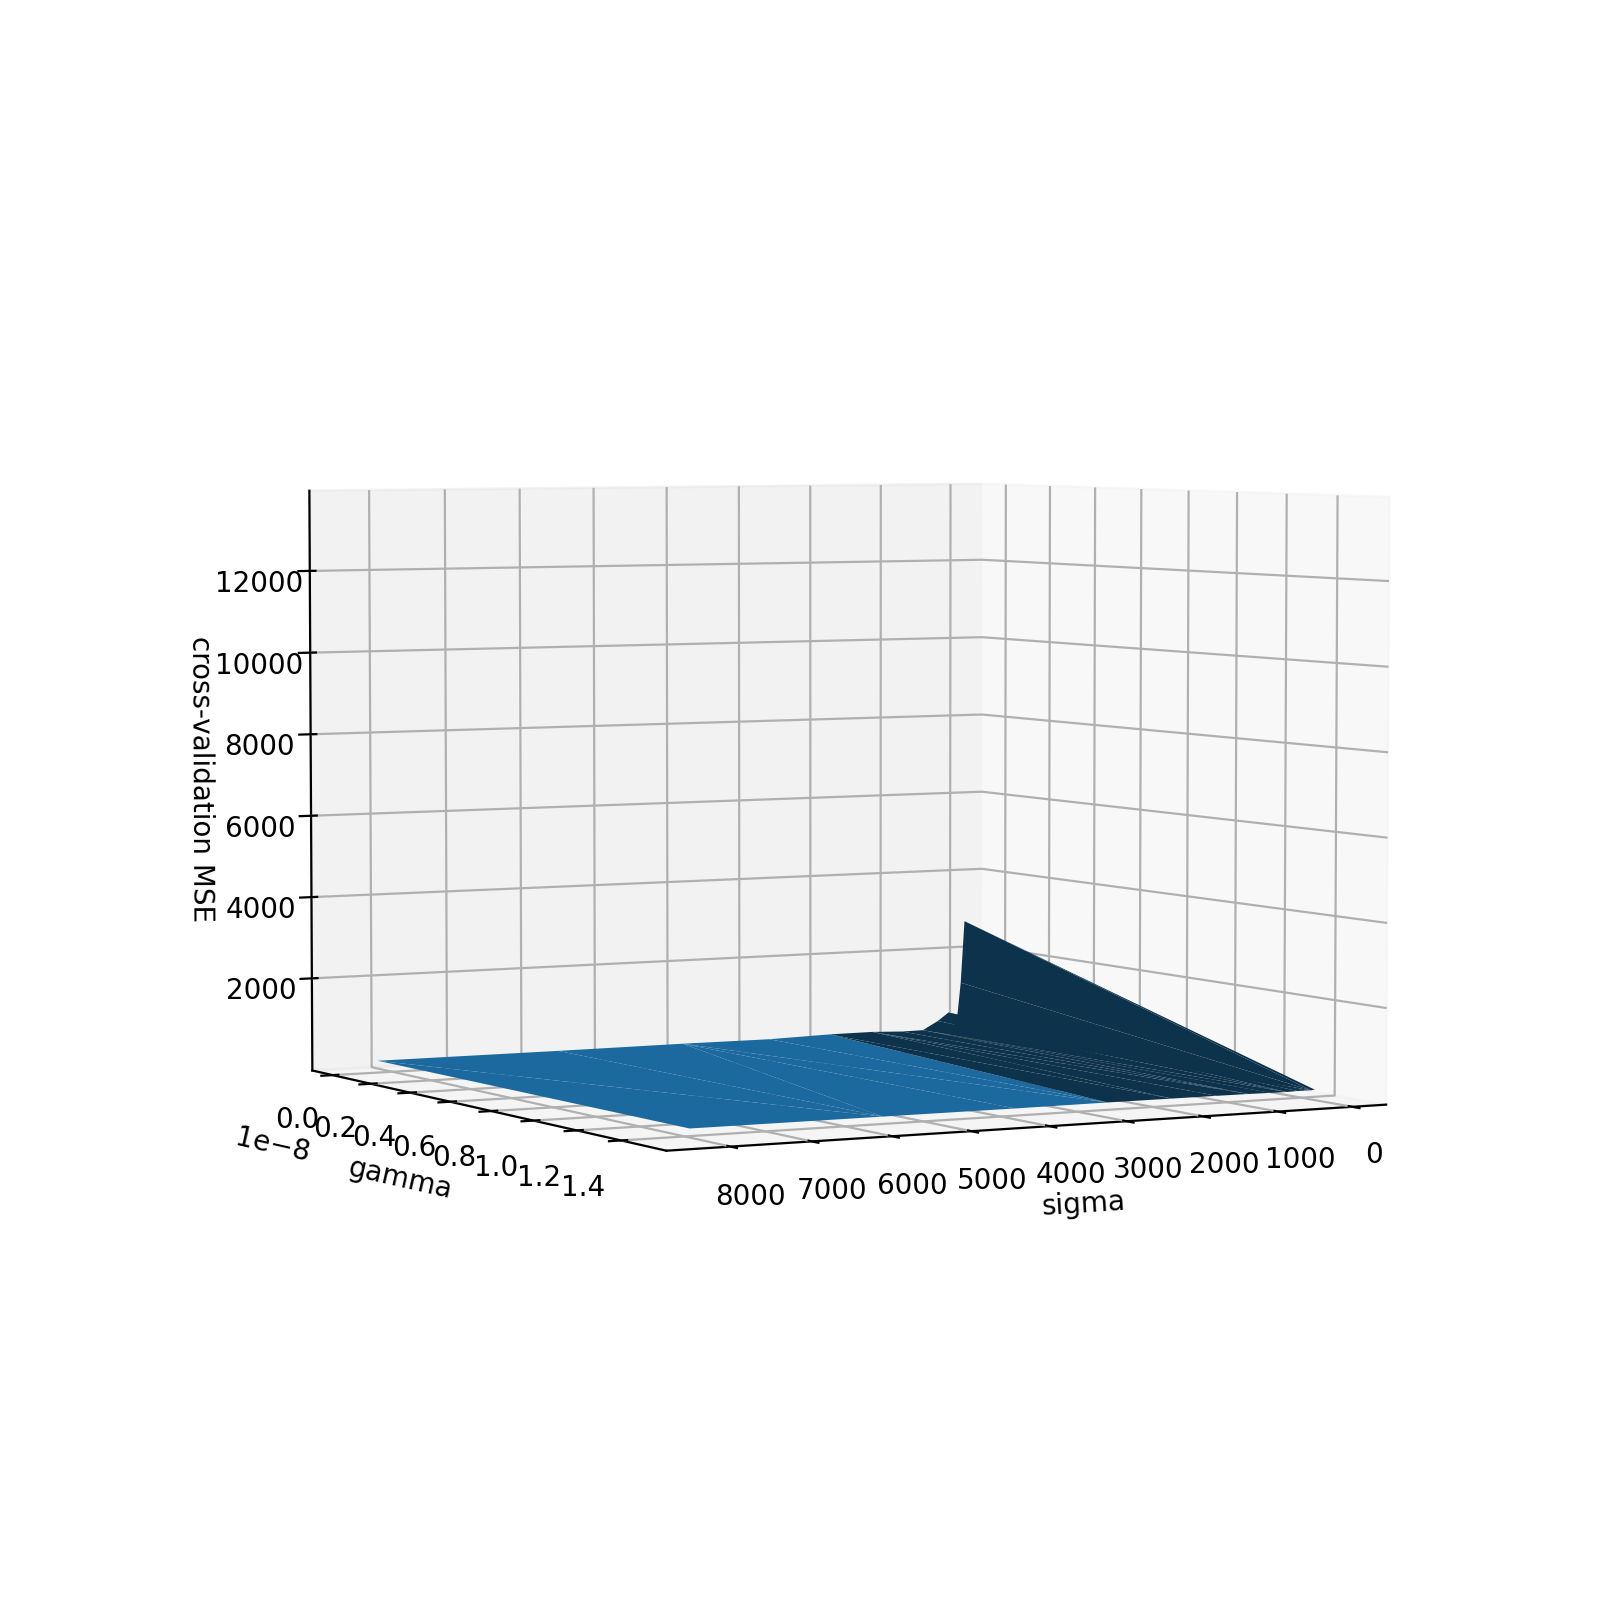

In [59]:
#make the 3D plot
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
surf = ax.plot_trisurf(x_sigma, y_gamma, z_MSE)
ax.set_xlabel('sigma')
ax.set_ylabel('gamma')
ax.set_zlabel('cross-validation MSE')
plt.show()

### Question 5.c

In [43]:
features = list(df_train.columns)
features.remove('MEDV')

X_train, y_train = df_train[features].values, df_train[['MEDV']].values
X_test, y_test = df_test[features].values, df_test[['MEDV']].values

MSE_train = compute_MSE(X_train, X_train, y_train, y_train, sigma_best, gamma_best)
MSE_test = compute_MSE(X_train, X_test, y_train, y_test, sigma_best, gamma_best)
print(MSE_train, MSE_test)

8.87473376060806 11.502322641276866


### Question 5.d

In [39]:
#the tuning function for kernel ridge regression with progress visualization
def cv_tunning(sigma_list, gamma_list, df_train, k=5):
    n_train = int(len(df_train)*2/3)                                #define the number of training data
    features = list(df_train.columns)
    features.remove('MEDV')
    MSE_list, sigma_best, gamma_best = [], 0, 0
    for sigma in tqdm(sigma_list):
        for gamma in gamma_list:
            MSE_cv = []
            for _ in range(k):    #k-fold cross-validation
                #split the data
                df_train_cv, df_test_cv = train_test_split(df_train, n_train)
                X_train_cv, y_train_cv = df_train_cv[features].values, df_train_cv[['MEDV']].values
                X_test_cv, y_test_cv = df_test_cv[features].values, df_test_cv[['MEDV']].values
                #compute the MSE
                MSE = compute_MSE(X_train_cv, X_test_cv, y_train_cv, y_test_cv, sigma, gamma)
                MSE_cv.append(MSE)
            print('sigma =', sigma, ', gamma =', gamma, ', MSE =', np.mean(MSE_cv))
            MSE_min = min(MSE_list) if MSE_list else np.mean(MSE_cv)  #the minimum MSE of the previous combinations
            if np.mean(MSE_cv) <= MSE_min:          #if the current sigma and gamma values give a lower averaged test MSE
                sigma_best, gamma_best = sigma, gamma
            MSE_list.append(np.mean(MSE_cv))
    return sigma_best, gamma_best, MSE_list

In [43]:
#function to evaluate models
def evaluate_model(df, model, n):
    '''
    df: the data to be splited into training and test sets
    model: the model used to make predictions
    n: the number fo runs to perform
    '''
    MSE_train, MSE_test = [], []
    n_train = int(len(df)*2/3)                                #define the number of training data
    for i in tqdm(range(n)):
        df_train, df_test = train_test_split(df, n_train)     #obtain the training and test sets
        MSE = model(df_train, df_test)            
        MSE_train.append(MSE[0])
        MSE_test.append(MSE[1])
        if model == kernelised_ridge_regression:
            print(MSE)
    return [np.mean(MSE_train), np.mean(MSE_test)], [np.std(MSE_train), np.std(MSE_test)]

In [44]:
np.random.seed(0)

data = []

means, stds = evaluate_model(df, naive_regression, 20)
data.append(['Naive Regression', f"{'{:.2f}'.format(means[0],2)}±{'{:.2f}'.format(stds[0],2)}", f"{'{:.2f}'.format(means[1],2)}±{'{:.2f}'.format(stds[1],2)}"])

for i in range(len(df.columns[:-1])):
    df_sub = df[[df.columns[i],'MEDV']].copy()
    means, stds = evaluate_model(df_sub, linear_regression, 20)
    data.append([f'Linear Regression (attribute {i+1})', f"{'{:.2f}'.format(means[0],2)}±{'{:.2f}'.format(stds[0],2)}", f"{'{:.2f}'.format(means[1],2)}±{'{:.2f}'.format(stds[1],2)}"])
    
means, stds = evaluate_model(df, linear_regression, 20)
data.append(['Linear Regression (all attributes)', f"{'{:.2f}'.format(means[0],2)}±{'{:.2f}'.format(stds[0],2)}", f"{'{:.2f}'.format(means[1],2)}±{'{:.2f}'.format(stds[1],2)}"])

means, stds = evaluate_model(df, kernelised_ridge_regression, 20)
data.append(['Kernel Ridge Regression', f"{'{:.2f}'.format(means[0],2)}±{'{:.2f}'.format(stds[0],2)}", f"{'{:.2f}'.format(means[1],2)}±{'{:.2f}'.format(stds[1],2)}"])

print(tabulate(data, headers=["Method", "MSE train", "MSE test"]))

  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 2778.103727760737
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 1923.547611510839
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 1382.8585158867331
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 2559.3115774268726
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 1369.8285668186097
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 616.3585586741225
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 251.7089827258203
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 182.4947192983767
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 218.8090840264353
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 287.0407690307899
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 47.400393562475934
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 79.60236715185425
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 79.15896220944038
sigma = 128.0 , gamma = 7.450580596923828e-09 , MSE = 9


  8%|██████▍                                                                            | 1/13 [00:59<11:59, 59.94s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 27.370247565850473
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 1197.9823556542683
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 561.2359342565552
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 1126.8077767851948
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 680.5129766945646
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 872.3002486306489
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 265.7770347115709
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 406.5193159893678
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 234.11814415437925
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 188.2691507620395
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 50.68255376487211
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE = 5


 15%|████████████▊                                                                      | 2/13 [01:56<10:36, 57.86s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 17.13668404337188
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 13673.507806636271
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 527.0267200142762
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 2854.0235053139672
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 2179.760172690616
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 978.756854208832
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 34.655817678902466
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 261.4625411622119
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 47.40043700596327
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 50.449136695037865
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 45.72934440158808
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 42.41931100977704
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 39.37066776306129
sigma = 256.0 , gamma = 3.725290298461914e


 23%|███████████████████▏                                                               | 3/13 [02:51<09:24, 56.43s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 21.159605813895844
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 3310.4288882655737
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 155.54813478499509
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 476.7063019766024
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 1931.689522984685
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 446.4265171082599
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 310.41060939203925
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 77.88732278532798
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 25.099219461499786
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 46.09073989591942
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 28.069054902739584
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE =


 31%|█████████████████████████▌                                                         | 4/13 [03:46<08:23, 55.97s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 20.463011794673044
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 64.06846819195842
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 1559.6196462822722
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 155.64865109855623
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 242.28824702441244
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 62.968066693028405
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 113.66674192440821
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 33.062128746922916
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 34.810459552362055
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 16.83568833217308
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 20.40418176396195
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 16.088172781594682
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 22.883856880114944
sigma = 512.0 , gamma = 3.725290298


 38%|███████████████████████████████▉                                                   | 5/13 [04:46<07:41, 57.66s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 13.92921881302073
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 27.857732902611225
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 329.6421566537385
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 82.87295732110269
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 24.8246028860513
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 12.38331015442031
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 17.533671214038172
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 16.508315500770532
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 23.21122305108296
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 54.429374326646645
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 32.75828738803101
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 21.0358032349


 46%|██████████████████████████████████████▎                                            | 6/13 [05:51<06:59, 59.92s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 16.475920051710638
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 66.95697907788185
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 17.68305789989944
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 23.713765574842174
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 27.874523144116814
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 14.10241871262564
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 50.06864636010597
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 14.44296287253537
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 12.684130501570333
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 17.693349124611405
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 17.29680568907486
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 20.251078281887896
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 23.637702888057653
sigma = 1024.0 , gamma = 3.


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:47<05:53, 58.87s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 22.60270520259599
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 55.26485595043549
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 30.55879347839715
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 39.71068441804803
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 53.79666550150356
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 21.220130824386374
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 26.789320483142838
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 21.064808881143193
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 23.032001911540082
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 18.66197494860827
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 17.5201249457471
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , MSE = 2


 62%|███████████████████████████████████████████████████                                | 8/13 [07:45<04:52, 58.45s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 26.01574373092088
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 22.928617180720227
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 52.210014228199114
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 14.81010465968987
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 19.22163027373633
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 42.055861298335536
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 13.37056149807977
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 18.55160059152703
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 16.902134030784723
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 14.736324632092598
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 21.729059899984584
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 20.97852792020087
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 21.375818508685143
sigma = 2048.0 , gamma = 3


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:47<03:58, 59.68s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 27.34886877748325
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 33.85323297480575
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 14.050773445298688
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 14.290571138689227
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 20.257932805064105
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 13.847472308275346
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 15.90277419576758
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 16.281102767322853
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 14.777469394336297
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 18.766906637008752
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 18.98690055372498
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 27.87586


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:48<03:00, 60.05s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 29.99432702942199
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 22.00669522267264
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 13.763077652328786
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 16.279887737958894
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 15.345249377167494
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 16.20167348474258
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 15.928874286966913
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 20.0100139997627
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 21.946378393363688
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 28.093019175232985
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 25.582391142391725
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 26.44325129755465
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 30.14429290448201
sigma = 4096.0 , gamma = 3.7


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:56<02:04, 62.27s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 24.608390068317807
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 15.3672496577321
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 14.341089875430114
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 13.894770169136342
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 18.858843326141702
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 24.781438408373965
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 18.19631783545575
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 25.594203432894727
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 22.203344259842453
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 26.10771536560888
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 23.725868310398578
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 26.94747


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:53<01:00, 60.66s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 27.558344867532504
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 18.44647632897294
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 19.703106465619268
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 20.304266124647278
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 25.648611621152167
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 25.76689084649948
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 24.12579331539049
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 25.4315777534268
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 27.39723221225853
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 29.51877992130028
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 27.427654393697367
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 31.73461491184309
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 27.511490319685862
sigma = 8192.0 , gamma = 3.72


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:49<00:00, 59.15s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 30.362510761208462



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[8.874733740882727, 11.502322494682922]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 957.1783024551384
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 1343.6517541709977
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 742.3731883120248
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 1449.936791006508
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 791.4268064022756
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 319.15012959092934
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 174.7456538370884
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 91.72189873661668
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 113.11900865229882
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 51.17969384027242
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 33.196018709226344
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 32.94306884513333
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 27.563720068809317
sigma = 128.0 


  8%|██████▍                                                                            | 1/13 [00:54<10:55, 54.64s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 19.316287880708504
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 508.1554970095247
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 323.6910467930202
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 485.4647165286011
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 140.5970265948128
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 295.9167703201164
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 450.1675947880195
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 45.646941234309686
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 75.80934741321867
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 44.824661453117955
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 50.3379516990698
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE = 39.


 15%|████████████▊                                                                      | 2/13 [01:51<10:15, 55.96s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 13.483507181477218
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 648.0134190841029
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 165.72658099709594
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 154.1482764382665
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 100.64407319376983
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 65.56017182598826
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 136.62459833693265
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 27.9789296550994
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 57.985519736754874
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 21.59039888376759
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 34.289113547482415
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 16.271208769460095
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 17.816622201439245
sigma = 256.0 , gamma = 3.725290298461


 23%|███████████████████▏                                                               | 3/13 [02:46<09:13, 55.33s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 20.949503075195334
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 85.71766524678733
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 64.36230006634102
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 71.26904349732328
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 34.53985023102116
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 23.06624186875008
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 24.98772109197686
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 34.727043694289634
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 29.779532246244333
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 21.159023906727946
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 16.81073897059934
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE = 1


 31%|█████████████████████████▌                                                         | 4/13 [03:40<08:15, 55.03s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 11.81170353545451
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 28.46143869713469
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 39.35437790920351
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 25.564979840077577
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 272.3010737081008
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 18.185678964590846
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 15.069705542252407
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 19.199817993124057
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 15.992919730830954
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 15.283754784122868
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 16.47633449485596
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 14.685223411222484
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 15.824808108381125
sigma = 512.0 , gamma = 3.72529029846


 38%|███████████████████████████████▉                                                   | 5/13 [04:38<07:27, 55.92s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 14.138270065088907
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 22.030380738080417
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 19.824288184537515
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 19.99180012056008
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 27.708178532542348
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 14.704257560332929
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 15.301864587303546
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 13.467633826157376
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 12.295632348983304
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 17.52902267842408
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 11.556852116555905
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 11.8396


 46%|██████████████████████████████████████▎                                            | 6/13 [05:40<06:46, 58.10s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 12.848581751107698
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 16.424510431569175
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 14.492612160906935
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 19.755973936857604
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 14.775213375981497
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 12.880064803342359
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 13.06875940301526
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 11.853942929778972
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 13.724075607831121
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 10.782573880365216
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 11.9369593487589
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 13.93282028264127
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 13.38382047129233
sigma = 1024.0 , gamma = 3


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:36<05:44, 57.36s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 21.186720528132845
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 15.889090357646278
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 13.939647338607562
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 20.059434445899296
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 12.95137078039971
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 14.031237153793816
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 14.295882077126924
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 14.993574348644724
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 12.570236955994712
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 14.418384257645366
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 12.518446757909693
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , 


 62%|███████████████████████████████████████████████████                                | 8/13 [07:31<04:43, 56.77s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 22.07047238734989
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 15.29142575720428
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 39.44324071055752
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 12.72509235493605
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 64.40845495985205
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 11.765813633001278
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 15.7598134580283
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 13.60799596541222
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 16.23742395075933
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 14.994710031759627
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 21.786138573841235
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 19.153272330730676
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 19.82507617138112
sigma = 2048.0 , gamma = 3.725


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:25<03:43, 55.92s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 22.3455794322635
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 16.18042851869526
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 12.125834818303488
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 42.550839083956404
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 11.57677543894297
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 14.681538342031217
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 16.482052161015854
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 14.34532824713087
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 16.968594994284775
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 22.276543212003574
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 21.68745274665263
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 24.5877171


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:21<02:47, 55.80s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 22.18967471872896
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 12.708990637442474
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 14.995995731825298
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 15.179412418916527
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 15.798569032394784
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 16.06417259641762
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 19.85377368793483
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 19.313350920704202
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 25.79416392924535
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 26.33390603139721
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 23.99361031413565
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 24.61093199061704
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 24.200977686855737
sigma = 4096.0 , gamma = 3.7


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:18<01:52, 56.30s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 26.364831888326904
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 19.01594023746432
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 14.610917708277901
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 14.380752659353934
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 16.654965083948372
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 20.34294493101545
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 25.431208717594
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 27.73868245377646
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 21.231939698575964
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 25.094417268662045
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 24.646207838713604
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 27.2871512


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:27<01:00, 60.05s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 26.34214490593398
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 15.638351688582564
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 17.846608200334543
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 19.7517828031105
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 19.386349608588496
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 25.62745353276904
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 24.085811410872157
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 23.348034805544863
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 27.70800122631593
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 27.651733079815536
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 26.41535073593972
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 27.401679661119033
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 26.09816466078281
sigma = 8192.0 , gamma = 3.7


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:41<00:00, 58.56s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 26.88447561280223



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[8.573514499507743, 12.42304270667119]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 3935.5032658618256
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 1439.1188486723247
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 6002.387325192083
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 10213.912876241267
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 4866.736477837864
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 268.5323462674238
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 959.2485724678423
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 3247.2097974343515
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 106.94127333732266
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 79.87391841188844
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 176.24476237211675
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 158.6894692709365
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 29.526455010671764
sigma = 128.0


  8%|██████▍                                                                            | 1/13 [01:04<12:56, 64.75s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 28.985857550501898
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 1110.785342438363
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 1587.5761543223014
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 3797.6643912749723
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 1435.5103766181828
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 369.758386589601
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 172.01783183941032
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 114.17584569608539
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 27.879316471632468
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 40.35723573725613
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 79.7143388805594
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE = 


 15%|████████████▊                                                                      | 2/13 [02:30<14:11, 77.39s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 32.80952049778745
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 238.37560370973415
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 389.6596170624231
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 135.08167757413065
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 264.99559613188626
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 84.53652613487624
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 56.41321170724674
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 129.91529834988202
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 44.50415405004851
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 28.927046819418944
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 43.170630171788154
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 22.64432019303472
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 62.02456412684991
sigma = 256.0 , gamma = 3.7252902984619


 23%|███████████████████▏                                                               | 3/13 [03:54<13:20, 80.07s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 15.793229458152206
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 102.62628405886669
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 109.64480604215589
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 71.61572354528178
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 36.74616009954186
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 37.06823235809951
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 32.706536708123636
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 29.711149391365176
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 17.585197695404872
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 18.536922366620495
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 19.037571596174935
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE


 31%|█████████████████████████▌                                                         | 4/13 [05:05<11:27, 76.43s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 15.175177714016266
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 40.6784493553394
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 54.48513585149391
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 31.449559782281494
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 22.475778473964247
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 22.183546254489766
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 15.204208501036637
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 19.67137119770826
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 19.773697586803955
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 18.71926381987759
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 22.221878583064743
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 15.559013006577795
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 14.264733144196565
sigma = 512.0 , gamma = 3.72529029846


 38%|███████████████████████████████▉                                                   | 5/13 [06:08<09:32, 71.60s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 13.292837076243865
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 29.985819726021894
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 26.971044318614595
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 20.131823629748318
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 29.845274723657575
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 15.413259030158457
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 16.434216900344154
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 17.100118477927744
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 29.62717934547718
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 15.321722151523556
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 12.50247422831566
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 14.0315


 46%|██████████████████████████████████████▎                                            | 6/13 [07:11<08:00, 68.68s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 13.539978176912323
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 21.291056712782776
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 30.744586863187788
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 20.148482839832063
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 18.277644624292094
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 15.030591564541476
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 14.91339911289846
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 14.385883768309037
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 12.177537740610159
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 12.934293028201102
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 12.555158573967944
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 14.944355383601936
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 16.08344590773948
sigma = 1024.0 , gamma 


 54%|████████████████████████████████████████████▋                                      | 7/13 [08:20<06:52, 68.74s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 21.15202175317073
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 20.390392516654593
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 14.117095916603656
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 17.220089802682143
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 16.430414583907037
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 13.88761755524942
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 17.205741629219993
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 15.883126162319911
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 14.65986575613232
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 14.116073930528643
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 20.483694227236555
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , MS


 62%|███████████████████████████████████████████████████                                | 8/13 [09:40<06:01, 72.37s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 23.271940628111754
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 18.319313641071027
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 18.60347543843658
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 14.368349351829934
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 20.538295215946032
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 17.1702064116107
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 13.417337391932074
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 13.4783948381294
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 14.690086888337031
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 14.763563156901537
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 16.48911951149823
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 19.258714311586598
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 25.914622615601758
sigma = 2048.0 , gamma = 3


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [10:47<04:42, 70.65s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 24.601858271558267
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 18.714979040576445
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 13.663563974279715
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 14.186036616518361
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 15.107793877253584
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 13.315480972480879
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 15.777894916303637
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 18.493818097392865
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 17.835612678403287
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 18.213253515690432
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 23.330005958000452
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 27.5


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [11:54<03:29, 69.67s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 26.436511494149947
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 14.904353160642335
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 18.137381448715303
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 12.826289929665808
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 17.318939588036645
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 19.402394382138827
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 19.21223596660135
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 19.21366683075038
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 26.61075084714015
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 23.63469795551546
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 25.909239255095507
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 32.520236234739286
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 26.065394110620353
sigma = 4096.0 , gamma = 


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [13:05<02:20, 70.10s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 30.81012220323717
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 11.162671369401872
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 16.172009685258494
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 15.976590749704679
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 17.265951844376886
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 20.76549038845795
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 21.600840831094196
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 27.9366546397351
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 26.23335709547795
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 25.30259798210017
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 25.609721726636558
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 23.2196294


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [14:11<01:08, 68.84s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 26.634680602030464
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 14.304772151775438
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 20.28941633258993
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 22.104040732529917
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 25.373685741583834
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 23.564752366169415
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 26.248136442159552
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 24.00974160589682
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 24.811076127005645
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 25.85366010270555
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 26.2466236090064
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 29.86770218029677
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 27.120746716227217
sigma = 8192.0 , gamma = 3.


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [15:23<00:00, 71.02s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 25.13509710075263



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[10.587257934083086, 11.905035193555175]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 1326.62514098753
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 485.940174770873
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 1430.259155740186
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 290.39044613546764
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 1893.5467612299794
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 297.47034058129015
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 306.76746012744894
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 198.2017095077735
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 97.65388994132024
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 92.7484126826716
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 226.64983777748995
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 49.661573737290965
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 37.91538183474275
sigma = 128.0 ,


  8%|██████▍                                                                            | 1/13 [01:31<18:15, 91.31s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 17.289619707183707
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 623.7253578537354
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 558.4982843424775
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 674.0373947404204
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 154.71587834487121
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 128.69189184526493
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 303.10076540963877
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 62.06644678297464
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 47.050464518854895
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 81.82143714927187
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 37.343262786216734
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE =


 15%|████████████▊                                                                      | 2/13 [02:49<15:21, 83.73s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 28.59313666760204
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 8529.23588987309
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 1326.767876530171
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 2335.7775346775425
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 3026.300938696094
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 115.46925747819989
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 50.012271132534536
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 110.89667887800917
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 535.7765298898582
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 286.4028350948919
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 351.40798816270893
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 424.3959931415511
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 21.64670315710398
sigma = 256.0 , gamma = 3.725290298461914


 23%|███████████████████▏                                                               | 3/13 [04:06<13:27, 80.77s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 15.792227858199595
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 110.83736335751053
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 40.2807786164435
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 2010.4266901842354
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 44.27528102350576
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 35.52870671579613
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 23.77754938742594
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 83.60902926854973
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 18.71898712381262
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 38.02890716371135
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 17.393754208203024
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE = 43


 31%|█████████████████████████▌                                                         | 4/13 [05:14<11:21, 75.70s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 18.544028083471144
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 45.17910077560403
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 717.1518927166578
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 33.689684455097265
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 596.2171983252719
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 366.1145099102544
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 369.4117345817502
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 42.72957127823976
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 19.716531186810034
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 36.08748876703751
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 14.936271747432324
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 17.35919447077361
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 17.215391325346282
sigma = 512.0 , gamma = 3.72529029846191


 38%|███████████████████████████████▉                                                   | 5/13 [06:11<09:10, 68.80s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 18.68044120327695
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 637.5533551346573
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 21.99311855426858
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 70.86804557159493
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 17.777816625560966
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 13.482327790486332
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 13.134975023304445
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 13.12766403418351
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 12.778525080308064
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 12.586288366649185
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 14.635384619017595
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 29.8071787


 46%|██████████████████████████████████████▎                                            | 6/13 [07:13<07:44, 66.38s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 21.658445975184737
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 22.053362763376544
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 20.341054634194947
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 17.1103199897508
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 38.04843158783332
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 17.078910333108897
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 16.07851085727332
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 28.002617005053754
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 32.3779479754863
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 18.08016679158448
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 39.22913544276553
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 14.409389309538508
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 19.253318963600382
sigma = 1024.0 , gamma = 3.72


 54%|████████████████████████████████████████████▋                                      | 7/13 [08:09<06:19, 63.21s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 21.173349004018657
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 28.8465314504786
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 16.8363683248202
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 83.32461613237385
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 15.961269526218228
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 15.268685912117178
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 31.71463367897103
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 11.187504503242604
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 14.471376336099633
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 14.784004330506386
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 14.322015135768202
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , MSE =


 62%|███████████████████████████████████████████████████                                | 8/13 [09:07<05:07, 61.56s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 24.56155123102422
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 15.369785321428708
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 13.343650266277681
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 14.90173411935022
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 39.63881054897338
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 24.63288679229322
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 28.806612533809705
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 12.928122615303403
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 16.215269770824893
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 16.321205102382997
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 17.63535251905062
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 22.231976857449883
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 17.70781148730752
sigma = 2048.0 , gamma = 3


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [10:03<03:58, 59.71s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 21.04036150144032
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 59.1136716512745
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 13.994294764362621
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 13.463763525239909
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 14.51850126238745
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 21.24107186189009
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 20.458673793667586
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 14.739500484843607
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 15.744977520484682
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 17.209581199935986
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 19.50148796455978
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 22.6688437


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [10:59<02:55, 58.45s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 26.786618870402567
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 15.673586515325004
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 17.862968327689863
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 20.469396904699334
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 12.42382318229468
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 15.306467281475241
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 18.16539168485534
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 20.41762012465925
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 19.316639678960073
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 19.85117993070964
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 24.92229284962066
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 23.308110641475935
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 26.218916123209926
sigma = 4096.0 , gamma = 3


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [11:55<01:55, 57.79s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 24.282422386117418
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 14.321006909032965
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 16.339898300828796
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 14.723252264035192
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 16.524363130323266
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 19.001103042651756
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 20.009439188643288
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 23.497640932486355
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 24.260240706874917
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 27.240937587921973
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 29.404840682258815
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 24.3


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [12:51<00:57, 57.15s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 24.348893848880245
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 14.931154603422295
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 17.06697640667591
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 24.236174863720386
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 23.67416737037845
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 25.64017840292495
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 22.696012355942166
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 21.650851377551554
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 20.26313323971004
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 25.145932370488204
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 25.887323395096093
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 26.1005641125946
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 25.358860795409207
sigma = 8192.0 , gamma = 3.


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [13:46<00:00, 63.56s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 30.83256286265897



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[8.591429901027949, 12.224161830637037]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 904.3345163742667
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 900.1967003546272
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 608.1547679281904
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 541.9516406695268
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 269.9185476066126
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 134.1968125710652
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 185.97165159710204
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 85.27879113747186
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 135.1576244798593
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 44.65622990240796
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 101.03249895208441
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 54.88010182187388
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 37.4376951237046
sigma = 128.0 , ga


  8%|██████▍                                                                            | 1/13 [00:55<11:06, 55.56s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 25.928849317306184
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 310.3092804885432
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 949.2701278889377
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 359.31588195498693
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 537.6640774084824
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 128.89862512865346
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 156.86912217913732
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 87.19922413424622
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 53.15464701437604
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 93.70869130922131
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 35.15812120025673
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE = 3


 15%|████████████▊                                                                      | 2/13 [01:51<10:11, 55.56s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 23.22152796486455
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 136.09109339399345
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 145.62691909771124
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 145.78911695609003
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 72.85228792159867
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 135.99332246961254
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 59.80229408525821
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 73.15430129408378
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 35.87252158428584
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 31.247900140769662
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 23.651608575999685
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 21.832091093840692
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 33.65378981614631
sigma = 256.0 , gamma = 3.725290298461


 23%|███████████████████▏                                                               | 3/13 [02:49<09:27, 56.79s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 16.24826684938973
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 133.15275706086754
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 75.73441928856434
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 44.812308092256565
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 31.393830533075118
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 483.99026608911356
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 28.426818611107688
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 21.146052020586886
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 32.07367678026891
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 18.40558041259954
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 20.471546619695157
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE 


 31%|█████████████████████████▌                                                         | 4/13 [03:45<08:30, 56.71s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 16.074633616700083
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 38.03658478224973
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 34.2959209228231
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 39.442495374060734
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 32.528365503649674
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 29.61372118124744
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 21.00442599528098
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 19.737594069127702
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 16.656476833429128
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 23.625861415707572
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 20.569680868737628
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 14.909658088058375
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 14.329275682724695
sigma = 512.0 , gamma = 3.72529029846


 38%|███████████████████████████████▉                                                   | 5/13 [04:41<07:29, 56.25s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 19.401317762673976
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 43.639712983950915
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 23.500260135717372
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 23.883626538319305
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 18.691956049850788
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 17.14950317313404
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 14.617882331222907
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 18.473997603161838
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 17.26244307125583
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 12.879653646477475
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 18.767823046675165
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 17.8960


 46%|██████████████████████████████████████▎                                            | 6/13 [05:36<06:31, 55.92s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 17.136600162750238
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 21.448015705264122
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 17.983968223597554
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 19.236104488834144
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 20.897665142353695
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 14.401106917292584
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 14.537428775428117
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 16.36610106190404
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 15.043578634427666
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 15.163676324521594
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 14.046765892983206
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 14.601724084494602
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 18.25412934476651
sigma = 1024.0 , gamma 


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:37<05:44, 57.43s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 20.514079448054876
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 17.84956554851641
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 16.50997344847682
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 17.78206730441748
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 19.32339657263736
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 14.907494214620334
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 17.78432089565906
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 13.86423760443079
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 12.820906994984409
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 17.764268057136157
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 19.65399382391042
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , MSE = 


 62%|███████████████████████████████████████████████████                                | 8/13 [07:34<04:46, 57.34s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 26.701426484399985
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 28.209052187669993
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 15.489491085542213
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 17.149297522197813
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 16.392322118692768
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 17.01085079614085
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 12.26406897309727
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 14.759455161188637
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 15.838357495407985
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 18.411816864004443
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 17.18403917193723
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 24.19580699848874
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 22.336014763652297
sigma = 2048.0 , gamma =


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:33<03:51, 57.82s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 25.44788660228613
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 19.688675389763414
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 16.71514154790639
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 14.307368587281024
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 15.690601187411769
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 17.449383632009628
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 18.88896431839961
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 24.065593327798265
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 20.57049040956126
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 20.89098007167667
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 18.836861436099515
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 24.808998


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:33<02:56, 58.73s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 24.133510835391796
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 13.40929392501097
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 12.449464558303315
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 16.408934506860884
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 13.410685684591247
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 19.145746776989803
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 18.3368436244153
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 18.29273918157415
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 19.92027770662991
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 20.07330811715583
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 29.41031534573802
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 23.144769102361185
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 21.52642069232557
sigma = 4096.0 , gamma = 3.72


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:36<01:59, 59.81s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 24.21957281675264
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 14.230453737129256
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 16.319694380093456
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 18.15089537965745
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 17.527365215549196
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 17.321639422265505
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 24.181950926099272
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 28.348801018292875
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 19.432095141480758
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 25.309612309547454
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 24.456867126610135
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 28.736


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:55<01:05, 65.64s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 24.011279039095008
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 16.311720997752314
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 18.769652504110137
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 19.767828687840233
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 25.92605467636961
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 21.493406434745832
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 23.23723931841667
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 29.90054848043364
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 19.89088778902747
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 22.63804822320318
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 25.905639494675864
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 25.780451225972694
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 23.101355416658684
sigma = 8192.0 , gamma = 3


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:59<00:00, 59.93s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 28.128921409231403



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[10.029698287820004, 10.972752587899825]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 777.6969200101468
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 347.22586350442475
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 5426.751785834664
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 362.46733327233284
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 6166.976296757561
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 1267.2042550684098
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 200.27810801515923
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 190.4163134571867
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 110.69165965749012
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 52.61429345189269
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 77.00589064598962
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 41.3550646925948
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 26.622405100893673
sigma = 128.0


  8%|██████▍                                                                            | 1/13 [01:01<12:13, 61.15s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 17.39923401488554
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 3250.2891898647804
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 719.6874816775443
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 177.37120184790328
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 156.48181305476686
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 180.24943260230816
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 369.7118989467071
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 443.88896708732136
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 97.02599303208858
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 100.81203408832285
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 44.901244264028044
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE 


 15%|████████████▊                                                                      | 2/13 [01:58<10:50, 59.17s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 23.99942482552579
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 144.6261759081405
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 150.28489180228127
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 110.62088982179439
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 43.856683688517776
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 57.703301764517605
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 47.38862946289836
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 22.38464493360984
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 39.83506989792215
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 16.377933288372297
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 21.65270559199585
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 15.510660561434273
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 21.149397469271925
sigma = 256.0 , gamma = 3.725290298461


 23%|███████████████████▏                                                               | 3/13 [02:58<09:54, 59.40s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 12.582997864620486
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 9040.36662140383
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 47.37775947426387
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 36.83939216544307
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 23.15215280154009
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 37.27249571688384
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 22.576828208229568
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 20.042550624181654
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 19.962984467867738
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 17.3614460620839
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 14.064250894377698
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE = 14


 31%|█████████████████████████▌                                                         | 4/13 [03:57<08:53, 59.31s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 13.76869804531258
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 36.940367308761665
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 406.9052352782314
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 29.309472289910993
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 157.43539153590544
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 14.990219522067303
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 15.367275168225802
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 13.795064402959184
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 16.587419853837034
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 13.153476674840784
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 12.364180645503263
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 12.298595391722909
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 15.797766678086052
sigma = 512.0 , gamma = 3.72529029


 38%|███████████████████████████████▉                                                   | 5/13 [04:56<07:53, 59.22s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 10.568640143111839
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 22.33439548939477
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 16.711461663082435
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 20.35709686830959
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 17.122031924459485
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 15.158350766651585
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 18.195296712390505
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 15.1181627550868
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 34.708899197266156
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 12.27545231881095
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 10.013473389206776
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 32.5475031


 46%|██████████████████████████████████████▎                                            | 6/13 [05:56<06:55, 59.37s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 14.311495458676841
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 17.33523265822408
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 16.340743701295647
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 15.116347730547869
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 12.708565786535763
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 13.077202901369592
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 12.380974197646236
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 13.053732110854742
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 11.663727574051546
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 12.226146185567261
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 11.888160282578568
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 12.171157919321084
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 11.358065392335426
sigma = 1024.0 , gamma


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:55<05:56, 59.35s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 18.607410820996726
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 16.999766511639272
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 21.45548725529474
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 13.689471581502739
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 16.315129273341327
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 20.56049610596038
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 10.365407635196794
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 11.01891688836766
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 21.827989327085515
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 14.58071804355871
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 14.130811648939432
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , MSE


 62%|███████████████████████████████████████████████████                                | 8/13 [07:55<04:57, 59.51s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 18.585093934130917
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 14.524282852795556
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 11.551226711345574
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 13.34902194401821
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 11.672497891148907
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 18.908894509963456
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 13.591016233563028
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 9.908086765417735
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 14.664798973437438
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 17.62030612973704
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 16.828113744570743
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 16.832860416728856
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 18.964669568696433
sigma = 2048.0 , gamma 


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:52<03:54, 58.57s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 18.924328584770684
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 22.6249598426872
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 12.365093351527864
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 9.842278026429957
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 13.315404948250123
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 10.403673790142076
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 13.198836985197996
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 12.457356174933263
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 12.62629476136492
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 16.49756552332243
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 18.545533254290934
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 20.638199


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:52<02:57, 59.10s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 25.833750143287034
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 11.282697348714827
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 12.121249208651838
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 13.862456519663064
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 11.635917448974334
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 14.807383923236873
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 13.33822259702021
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 15.658633601572703
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 20.722739667221486
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 18.742947069026872
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 20.711970857211753
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 21.38372597238173
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 19.411807371300625
sigma = 4096.0 , gamma 


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:50<01:57, 58.93s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 23.823887203728248
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 12.869840708339899
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 15.26550135068743
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 11.547588936062294
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 16.11288735632876
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 17.156822992667298
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 17.336335833004437
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 19.872420646732934
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 19.858683959846786
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 23.24341698847062
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 23.620323702696226
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 23.6785


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:51<00:59, 59.44s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 24.143353040628217
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 16.25101306601824
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 15.986010545601204
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 15.153038922198633
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 17.58045024539731
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 24.87523466614882
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 22.64958292363209
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 20.126543503960637
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 20.897334500321
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 24.39620748624257
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 19.20968392111499
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 23.454309339896064
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 23.35608722892142
sigma = 8192.0 , gamma = 3.7252


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:52<00:00, 59.45s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 25.942624125119277



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[7.437337460146253, 15.744381961910944]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 5050.858051687304
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 6351.655185798301
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 1628.3414321432074
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 454.04824649074146
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 1009.1836020604687
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 8143.68029021543
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 1337.3979714853017
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 384.6810789287814
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 607.9787564294705
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 92.70251877176875
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 442.77994524245
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 174.65322445164756
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 27.719847974440107
sigma = 128.0 , 


  8%|██████▍                                                                            | 1/13 [00:59<11:57, 59.83s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 43.11121089291456
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 8808.980284760353
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 275.2447465129136
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 369.3582582592042
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 182.59397571704102
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 311.2909015871507
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 71.59615173836471
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 299.7199009551749
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 222.57537566353477
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 126.3657505177209
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 125.7151782601687
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE = 61.


 15%|████████████▊                                                                      | 2/13 [01:59<10:58, 59.88s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 84.75785606130259
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 587.9031730377892
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 147.09533112277288
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 140.42261375523339
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 422.09358162124573
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 187.46232795950235
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 46.46235717828488
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 91.37237548509519
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 84.61720936630573
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 35.302349272457626
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 69.59168197771388
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 46.72253723492843
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 34.317897713615686
sigma = 256.0 , gamma = 3.7252902984619


 23%|███████████████████▏                                                               | 3/13 [02:56<09:46, 58.65s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 24.953520942772265
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 155.28998435196178
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 41.78805486047203
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 151.29809560592182
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 234.90582311311465
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 32.80235492276876
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 59.905398606541986
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 52.349679922468646
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 31.077104970337142
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 13.658600959107606
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 28.563958448897118
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MS


 31%|█████████████████████████▌                                                         | 4/13 [03:57<08:53, 59.31s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 28.25047829828575
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 56.97387227077572
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 59.7475915867155
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 22.392123435897854
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 81.60796181738172
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 23.3563798546815
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 91.76326202333975
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 15.260638606373153
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 85.24971157876932
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 27.8296672155571
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 19.36362132812577
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 14.781598729446966
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 19.958546317102382
sigma = 512.0 , gamma = 3.725290298461914e-0


 38%|███████████████████████████████▉                                                   | 5/13 [04:54<07:49, 58.68s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 15.759375231537433
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 82.82174977168403
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 55.42496887873805
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 39.65102504720033
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 15.611351081209232
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 17.84447094529347
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 50.860703470735125
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 18.328691596622992
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 23.391006327999854
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 14.51879932784928
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 28.796174388102322
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 15.4572607


 46%|██████████████████████████████████████▎                                            | 6/13 [05:53<06:50, 58.62s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 19.235179839728943
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 20.97422241825408
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 15.32332247081197
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 18.218220378426594
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 21.038139334117254
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 19.431433997541088
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 17.086645538159257
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 15.658214943838578
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 16.749793671223337
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 18.142283680649406
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 16.082750725290868
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 14.286238412437493
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 17.696074721343475
sigma = 1024.0 , gamma 


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:52<05:52, 58.74s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 18.496756294456944
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 41.037465829780714
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 40.111043505938014
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 27.317025165164175
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 16.49977905469229
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 14.948248292380503
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 24.698574214835986
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 22.88982646426596
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 15.918489717909523
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 14.528095310272159
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 19.466130898603456
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , M


 62%|███████████████████████████████████████████████████                                | 8/13 [07:50<04:52, 58.56s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 19.499802314739764
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 18.689860886059115
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 16.97820270137397
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 49.81431082281318
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 20.96570925394487
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 14.53485431617801
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 12.75545752505619
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 15.341716953429819
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 16.292368272251984
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 17.818655267076405
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 17.512698775042516
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 19.76246188240139
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 22.395883355748776
sigma = 2048.0 , gamma = 3


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:48<03:53, 58.36s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 27.990870047940525
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 24.807134084380504
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 17.463084415460195
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 42.84500540888413
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 16.86851763295694
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 13.798707005959624
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 20.151298595259522
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 17.719884598965347
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 17.784078652555213
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 22.797406619240622
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 21.763260131700157
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 20.764


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:47<02:55, 58.46s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 26.962700987448166
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 17.293658748954112
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 17.758526423525723
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 14.250610271565424
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 14.629541070539876
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 17.708318932687057
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 16.695354260880375
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 18.110236383822695
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 18.845392220389392
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 24.552087788618635
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 23.14298313043991
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 22.974327936173857
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 28.472257762459016
sigma = 4096.0 , gamma


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:45<01:56, 58.32s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 28.37704288964474
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 18.056991394938144
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 15.152398640057253
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 15.304431399184693
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 18.402569842917735
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 20.74816272908422
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 25.919596142174687
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 21.42221820857157
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 26.61728391343791
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 25.138772317988973
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 23.552291341709225
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 21.61096


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:46<00:59, 59.14s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 24.377616468254026
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 21.448936780424958
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 20.150850891670558
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 19.919953773328153
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 25.897054923578075
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 25.793087048667445
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 22.37379214084739
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 23.448887229482565
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 24.378088292410116
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 27.3661264891361
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 25.76897714342138
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 22.09788026555652
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 27.009500665413857
sigma = 8192.0 , gamma = 3


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:45<00:00, 58.88s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 29.550111824178526



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[9.527648288751902, 11.934239470346162]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 3138.0171908585316
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 824.52898402007
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 1172.0269224276985
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 3318.3777333552403
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 6765.753260042921
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 760.3744653275144
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 246.4328456855119
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 770.0363560041674
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 952.1820601554725
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 117.61898014725466
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 266.1739686416072
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 67.84410909844057
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 50.609550692338246
sigma = 128.0 , 


  8%|██████▍                                                                            | 1/13 [00:58<11:38, 58.20s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 27.188253868927497
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 872.1856579191884
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 425.91226185297603
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 4041.7022546416506
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 1444.9580292215614
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 1170.6759615106307
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 147.6336781290691
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 274.1081533146356
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 65.55114527550795
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 140.72156666883862
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 106.91351685526857
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE 


 15%|████████████▊                                                                      | 2/13 [01:58<10:50, 59.17s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 20.881528406421133
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 3447.349986817163
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 945.7863485895359
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 424.95475288291965
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 139.34709688855048
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 54.486876331109066
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 49.326923534741795
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 39.35749346343783
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 40.16965277968363
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 27.483499161426465
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 17.68409359781716
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 119.94299957295104
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 87.76761503623189
sigma = 256.0 , gamma = 3.725290298461


 23%|███████████████████▏                                                               | 3/13 [02:56<09:50, 59.04s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 24.582925549729765
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 2347.0392266323047
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 66.77999131687052
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 4381.592328337558
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 1032.6788566237972
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 212.15409413574258
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 26.84685204604633
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 101.44856983618543
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 18.310194840648485
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 29.422793640388676
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 20.931970303599677
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE


 31%|█████████████████████████▌                                                         | 4/13 [03:56<08:54, 59.36s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 14.30621987261299
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 43.127776270701915
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 38.4745516894118
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 1582.6447002029884
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 33.69757645884239
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 409.707343196147
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 18.475537298283484
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 17.612224110104968
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 58.83123087329062
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 46.38144116588797
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 26.507650046253918
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 17.35887995871178
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 14.063019361280741
sigma = 512.0 , gamma = 3.725290298461914


 38%|███████████████████████████████▉                                                   | 5/13 [04:56<07:55, 59.47s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 17.197473333107535
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 26.285061546170066
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 17.121899115787336
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 411.07206741114595
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 216.93141656420684
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 74.06603266818169
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 16.53852236054961
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 13.248217421556765
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 13.026203722725773
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 17.20279929143002
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 16.99586457871777
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 15.009868


 46%|██████████████████████████████████████▎                                            | 6/13 [05:55<06:55, 59.43s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 15.926370631250933
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 19.0414684896175
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 15.32776782191616
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 17.011954638378995
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 18.692632310840498
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 15.16554614153875
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 15.796697733147855
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 19.85830771638235
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 16.088235036998434
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 37.107580721784586
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 15.518086996040584
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 25.886952379382926
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 16.117404631078536
sigma = 1024.0 , gamma = 3


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:56<05:58, 59.79s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 19.377134610057645
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 19.542096725637514
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 70.38321042012856
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 21.996790625016693
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 19.7916363235297
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 15.096808629066729
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 15.628907389805809
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 15.743397727917472
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 13.73328469644932
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 23.12309956869624
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 15.483438801758997
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , MSE 


 62%|███████████████████████████████████████████████████                                | 8/13 [07:53<04:55, 59.09s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 23.066467521530633
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 15.512522314998836
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 15.283442604888327
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 36.851148318489656
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 14.12909458878591
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 14.354136894924054
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 27.289681643945578
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 11.12333179172823
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 14.914151591568004
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 15.741755632149227
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 16.70718152419159
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 16.90684995692886
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 23.727778174188217
sigma = 2048.0 , gamma =


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:54<03:57, 59.46s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 28.956378844647265
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 15.178195233133994
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 13.615783384895366
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 13.845054015423244
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 21.71799856219066
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 13.361752171295109
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 21.604331074934326
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 17.3643303726249
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 14.953697282860137
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 23.035935160729345
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 25.156189444054732
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 27.4102


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:54<02:58, 59.59s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 29.39239583842241
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 11.635517204135468
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 21.825386407843364
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 20.54433244458703
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 18.898459613310262
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 16.614983250204478
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 15.043203085981366
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 22.20340884558034
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 29.883675194688728
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 18.629183558262213
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 23.61320509862938
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 23.240552339563113
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 29.104838881097976
sigma = 4096.0 , gamma = 


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:57<02:01, 60.77s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 29.961802920872152
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 15.972432723726845
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 13.004917963686395
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 18.863129175399667
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 15.84574273322595
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 22.51747733955208
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 20.122921381211984
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 17.051845617937452
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 22.844555292371393
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 24.813043418103625
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 25.156315262940574
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 24.496


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [12:02<01:02, 62.04s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 30.137286021622117
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 17.10452595065792
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 19.38494100623442
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 19.355465162771793
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 21.4000653959341
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 20.247805096478448
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 22.825993565237933
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 30.261714261815676
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 23.165184253094868
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 24.19697011689886
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 28.654784735423902
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 27.23316866276278
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 28.764235548017716
sigma = 8192.0 , gamma = 3.


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [13:00<00:00, 60.06s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 30.27135542036754



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[10.180987881733891, 13.840265038014563]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 475.2194002895026
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 1060.6416521035956
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 947.6784404035725
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 385.43168934406714
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 736.8084927110119
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 783.4444837396189
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 229.6299704392527
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 183.5335922278119
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 61.46467388803941
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 163.33689336805506
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 106.15073810167515
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 60.70942524353053
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 64.42334949362507
sigma = 128.0 


  8%|██████▍                                                                            | 1/13 [00:59<11:50, 59.20s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 20.021184526480045
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 210.2594466828025
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 209.02261404764053
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 296.3507113653048
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 841.3425623468572
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 199.47871343026452
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 91.16795028025072
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 43.75591209586629
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 43.55980345234592
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 47.013233583092486
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 66.80704203925472
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE = 3


 15%|████████████▊                                                                      | 2/13 [02:00<11:01, 60.16s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 20.089681671003895
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 149.11348100806995
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 319.4903698469799
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 71.07900215388227
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 86.48900472116975
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 67.3682423919617
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 116.02296237402841
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 43.574843118527994
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 38.46606404652441
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 23.37590702327059
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 25.958829050740157
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 16.855219692642287
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 18.014292641706167
sigma = 256.0 , gamma = 3.7252902984619


 23%|███████████████████▏                                                               | 3/13 [03:00<10:01, 60.12s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 19.122013487406853
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 53.16953466300471
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 34.70471167552199
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 55.380212723473946
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 45.73150766305687
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 27.581365675602576
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 27.976798209987482
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 21.642331459047398
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 25.131705766306773
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 19.06522547483984
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 17.950778093955716
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE 


 31%|█████████████████████████▌                                                         | 4/13 [03:57<08:50, 59.00s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 13.86128521465668
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 34.432364948799574
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 35.17841153393782
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 20.748484494890185
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 19.331670668332904
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 37.89497903150847
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 20.48105704235065
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 17.425329394218767
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 21.69798948215046
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 19.136461202244337
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 13.698399867834812
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 14.278651439200008
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 12.471605485697674
sigma = 512.0 , gamma = 3.72529029846


 38%|███████████████████████████████▉                                                   | 5/13 [04:54<07:46, 58.26s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 18.825779964709582
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 22.990521028010836
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 18.852675259025876
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 19.167902339669286
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 21.05179675980423
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 14.915008153382033
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 16.3967465698509
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 15.843062766448444
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 13.951692882200248
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 14.552726649123546
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 15.243728672708812
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 13.83918


 46%|██████████████████████████████████████▎                                            | 6/13 [05:54<06:51, 58.75s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 20.215957566406743
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 19.88549522701124
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 14.757478775595605
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 15.872428821541927
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 17.884187714686384
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 15.226428391437068
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 14.948113302421996
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 15.87528310356094
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 15.254495417482065
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 12.58834352377745
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 22.176789140249966
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 13.998871442471938
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 19.50404953190266
sigma = 1024.0 , gamma = 


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:51<05:49, 58.18s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 21.900539060575433
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 17.717202439304934
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 16.033458289627575
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 13.782693412393504
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 15.891416485110108
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 16.35253738972213
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 11.64118269031474
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 11.536888402582798
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 18.341058469479353
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 13.801103109208848
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 14.925480442601701
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , M


 62%|███████████████████████████████████████████████████                                | 8/13 [07:48<04:50, 58.07s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 23.420102764411343
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 17.64375027382476
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 16.09594106197077
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 13.953711418381221
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 16.243045812729413
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 15.627202531955655
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 12.408099928072023
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 13.538935483723119
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 13.343374449448817
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 13.897622790641766
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 18.31070122987797
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 20.544454078002207
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 23.518505427358928
sigma = 2048.0 , gamma 


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:48<03:54, 58.53s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 19.436950740793158
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 13.379615860391619
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 12.790800306704663
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 15.967227132452795
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 14.559624471057054
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 15.870342070529034
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 14.681317274960737
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 14.327761627933715
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 16.992668863517558
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 16.947726438548926
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 21.251758740604398
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 23.3


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:49<02:58, 59.36s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 24.740249852457303
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 13.499944305207885
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 13.587823963596758
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 16.133233287861188
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 16.981127904968737
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 17.335251439481357
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 16.549114780307768
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 17.487722873292043
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 17.439304155557302
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 23.370748252104146
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 30.857397408790643
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 19.879873832166766
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 27.120588870623486
sigma = 4096.0 , gamm


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:50<01:59, 59.91s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 28.023275379875884
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 13.338773691268807
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 14.585106274498589
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 14.898123098077907
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 20.10519606331087
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 20.406933899204823
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 21.00695744144741
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 24.19017873970687
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 23.220261221554697
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 20.42581724536379
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 22.308632404583534
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 24.47604


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:50<00:59, 59.92s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 30.047504013996303
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 15.779098755410882
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 16.622817072009962
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 15.497500458100314
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 23.681500402460607
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 28.460949853156496
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 30.265442778057132
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 24.192459013502013
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 23.050359725473836
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 25.265974495186878
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 28.880635158382592
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 29.827283946815847
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 23.38098745325444
sigma = 8192.0 , gamma


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:52<00:00, 59.41s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 22.64238171170301



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[9.144549892665152, 14.669189299949059]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 542.0181978222996
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 1802.3473373628374
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 525.4167451677811
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 1865.2071961309969
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 1918.0776672527768
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 503.8799769890894
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 445.80048154587604
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 768.3162212027121
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 156.76801324672073
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 69.7650160752322
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 82.76642032704618
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 49.94113294672367
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 40.74916076761541
sigma = 128.0 ,


  8%|██████▍                                                                            | 1/13 [01:05<13:09, 65.82s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 40.13556912878437
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 1075.0847083775848
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 864.865468149513
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 478.13820712640654
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 519.1297107819561
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 1399.7334093123745
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 262.5108403983374
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 460.82243797169997
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 72.3286563460934
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 58.07101157004556
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 38.7508070697898
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE = 32.7


 15%|████████████▊                                                                      | 2/13 [02:05<11:27, 62.47s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 27.05759267509893
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 11587.595174348924
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 146.93704064887
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 113.58930456768005
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 145.786413419164
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 95.81322313626971
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 74.64924592840404
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 48.00650847802206
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 24.180776103653812
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 35.284960262166905
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 31.934111477613264
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 21.63294379099772
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 27.785208085845284
sigma = 256.0 , gamma = 3.725290298461914e


 23%|███████████████████▏                                                               | 3/13 [03:07<10:18, 61.85s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 21.5092340676688
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 821.618233272091
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 259.58905598836844
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 238.146103985833
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 81.30024069354822
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 36.864321955425176
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 46.79676157418494
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 27.219281477204312
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 22.96515371271861
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 177.323829685878
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 32.52502672035569
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE = 31.909


 31%|█████████████████████████▌                                                         | 4/13 [04:06<09:09, 61.02s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 15.057259749206256
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 65.76363232118895
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 76.56658740813354
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 24.89852173279522
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 22.764249321457772
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 23.63959917973427
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 21.28694048424634
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 67.88984213677733
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 19.52111418456666
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 20.292029262802085
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 15.932039035997835
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 15.005910434852064
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 18.18269229202288
sigma = 512.0 , gamma = 3.72529029846191


 38%|███████████████████████████████▉                                                   | 5/13 [05:04<07:57, 59.71s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 17.69656469318476
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 35.428013962997824
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 30.020580571523872
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 33.37553981843686
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 32.80644995989347
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 21.0321349046117
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 24.964994722767084
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 14.569988838447992
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 19.6281147714297
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 17.819639273436596
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 15.886365189304655
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 14.752695474


 46%|██████████████████████████████████████▎                                            | 6/13 [05:59<06:47, 58.16s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 18.39505882966305
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 21.86685537485993
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 18.644938346357016
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 37.76363587619443
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 17.365022627789266
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 17.416243140710165
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 17.53246779817139
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 16.571102762365214
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 17.7539585555251
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 15.038128047278638
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 15.108804411140898
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 19.607249480305246
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 26.70349316545167
sigma = 1024.0 , gamma = 3.7


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:54<05:43, 57.22s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 22.637873579565095
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 18.21092963674996
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 21.266590779133757
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 21.696692954680977
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 18.899617249780313
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 15.969411056338382
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 16.56347381606742
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 15.116855804242245
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 31.424073845386204
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 15.224740240433007
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 20.654271671448104
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , M


 62%|███████████████████████████████████████████████████                                | 8/13 [07:49<04:43, 56.62s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 25.3590657353074
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 14.141842745613525
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 17.982267644855078
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 16.00936396549497
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 20.57828631113552
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 13.520175040469649
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 17.910890190287375
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 16.060224197540286
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 16.376237218802416
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 15.12329192689237
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 20.63804623931134
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 17.32757208142628
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 25.178538912007806
sigma = 2048.0 , gamma = 3.


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:44<03:43, 55.95s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 23.16778417867734
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 17.384071411405493
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 17.130955750137492
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 16.934739815025104
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 18.115561503389934
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 16.278725882492566
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 16.40003889612023
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 17.456628463005053
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 21.04281256446789
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 26.450737303785598
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 26.522597395581776
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 24.9080


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:41<02:48, 56.22s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 26.2014668546832
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 14.821664617792532
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 26.794789699537795
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 17.004546267483462
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 18.07042192036736
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 16.037788511157707
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 21.230029084310974
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 23.729883314893403
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 22.49521816348777
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 25.13678070909241
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 24.401687212735546
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 23.573192427945454
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 29.24918050447111
sigma = 4096.0 , gamma = 3.


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:36<01:51, 55.84s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 25.873901194662842
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 15.53880704996566
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 19.857164350594125
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 18.25459264049376
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 19.45714390290447
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 20.876085654786944
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 28.404991403628266
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 25.943119572841965
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 25.509017917130798
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 22.065048053101915
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 22.392668737481635
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 25.5831


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:32<00:55, 55.83s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 27.601974753878437
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 13.49567283510184
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 26.93683397686086
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 19.648332786906987
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 22.44600864250696
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 22.980655316341387
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 21.86444385513792
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 28.69137776491251
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 26.4273319153839
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 26.041591483987236
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 25.744786542060456
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 21.570262333341606
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 22.418880628647646
sigma = 8192.0 , gamma = 3.7


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:30<00:00, 57.70s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 26.849497705110387



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[13.179291818375772, 12.742857147532211]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 1213.0044583383092
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 2812.4412463227304
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 1315.738195248325
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 15727.386285894003
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 2026.4866902977192
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 494.12255086324467
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 1042.9383879166935
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 123.29792308074418
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 312.56134489133956
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 168.06550667200025
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 312.7898950577446
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 49.777806377129444
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 62.767926169491844
sigma =


  8%|██████▍                                                                            | 1/13 [00:58<11:40, 58.38s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 30.738516473453195
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 2596.6884659036887
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 707.0504921896876
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 360.76167944804246
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 447.25560268731704
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 1524.5877308623872
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 1764.9198036368925
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 217.83218445298706
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 49.490550435533095
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 47.84952516544928
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 33.7606460459025
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE 


 15%|████████████▊                                                                      | 2/13 [01:57<10:45, 58.67s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 17.562365270821743
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 14351.394290047869
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 158.73839589436602
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 111.06667922822298
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 92.10813510787997
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 2035.9603930452347
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 153.73289181547506
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 32.19591943155352
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 127.33536702387127
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 22.915180314673467
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 23.640961230401636
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 23.326249995562016
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 14.453276658689342
sigma = 256.0 , gamma = 3.72529029


 23%|███████████████████▏                                                               | 3/13 [02:53<09:34, 57.47s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 20.515915746989577
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 4834.837342684044
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 2204.000525473108
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 72.66777915917974
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 204.45153703811326
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 671.8619533096305
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 263.5043715801616
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 17.31087183975651
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 51.718285803079844
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 17.082536577641253
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 18.111356804612246
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE = 


 31%|█████████████████████████▌                                                         | 4/13 [03:49<08:31, 56.80s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 18.62501814968321
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 145.7495011547268
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 26.75792195559564
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 580.0523853918979
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 278.7978689915645
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 18.066251061777784
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 14.562520234084294
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 105.40219606725609
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 17.328060806371692
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 39.085860817298666
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 28.10293498330635
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 21.21181146217362
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 15.004680950036217
sigma = 512.0 , gamma = 3.7252902984619


 38%|███████████████████████████████▉                                                   | 5/13 [04:44<07:31, 56.38s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 17.988084873233014
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 31.033366803016257
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 231.82872538562856
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 68.76312274309896
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 162.97103858979216
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 35.06770242889154
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 13.194482616044784
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 15.962596021629114
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 40.902528369330454
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 15.338082983059925
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 13.196045512411013
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 16.6242


 46%|██████████████████████████████████████▎                                            | 6/13 [05:42<06:37, 56.82s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 17.503970944288007
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 59.32286118231675
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 18.469331614481508
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 12.341219691221612
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 44.247025124620166
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 17.941543116589965
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 13.72565770643448
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 46.54511739424843
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 41.05374362402766
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 14.412327731685854
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 27.991278696745553
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 15.837824132100565
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 18.76694316940327
sigma = 1024.0 , gamma = 3


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:38<05:40, 56.71s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 23.362340413786175
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 56.719887481393265
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 17.157768826249484
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 49.974743247720326
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 15.10455214062577
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 62.47965543558862
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 75.95760181301488
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 14.51818602119119
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 14.36969500823388
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 30.21374835460597
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 16.53596712967869
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , MSE = 


 62%|███████████████████████████████████████████████████                                | 8/13 [07:34<04:41, 56.35s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 23.20384100917432
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 17.09856190176544
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 15.023433569927565
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 19.207889406237246
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 78.93444063589669
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 28.8381331843397
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 12.076082474701638
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 43.48250931071876
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 16.116734211021313
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 15.907797606511242
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 19.09968023479525
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 20.34166173754894
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 22.791228912139324
sigma = 2048.0 , gamma = 3.7


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:29<03:43, 55.84s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 28.201214049782237
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 12.743225413152905
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 23.317665922688903
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 15.818985970906988
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 17.42936550485394
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 12.859450446261667
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 15.706544500684549
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 17.023807591941676
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 18.7365056299156
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 24.188770354466918
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 28.764175486092796
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 22.8825


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:25<02:47, 55.93s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 30.77554163603253
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 34.45854667177379
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 24.61123792282541
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 16.356126680421255
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 14.6381209513099
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 18.0174102966204
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 15.304595078926184
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 23.69755647930148
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 21.069467075608465
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 27.25907114895339
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 25.392544133544085
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 26.951193889482795
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 24.11994628418009
sigma = 4096.0 , gamma = 3.7252


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:22<01:52, 56.18s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 25.94420545386432
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 16.755205806595935
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 16.803097011636105
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 20.212013053108745
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 17.403426617526645
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 23.045124248129593
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 27.017449949250427
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 24.312355853618747
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 26.240168915718233
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 27.238723942688456
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 29.17990532126144
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 28.971


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:18<00:56, 56.12s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 31.262831699028833
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 19.85675640462929
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 22.09697520489433
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 21.255771084839232
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 25.93943554789589
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 23.772159394161996
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 30.37682032004792
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 29.345798480922117
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 28.422066852439947
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 26.529834689575114
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 24.94826292639737
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 31.110331688668225
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 32.47635165194235
sigma = 8192.0 , gamma = 3.


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:12<00:00, 56.36s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 30.18457410065907



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[10.080538594636815, 10.994669228422293]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 906.0573573329837
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 5438.823195822386
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 1754.4675396475104
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 469.41941347868396
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 2160.3573624413684
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 1100.2710928756003
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 191.26421028325066
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 168.63349122465624
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 549.8040728554604
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 175.33641023453532
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 120.55892381659976
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 75.14994797667393
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 20.737108483593477
sigma = 1


  8%|██████▍                                                                            | 1/13 [00:58<11:46, 58.84s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 24.37011601552932
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 710.2905168906206
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 1467.5881940089564
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 673.0586359302989
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 534.1360770125611
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 159.303584446564
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 159.78863526493498
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 61.32555338459533
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 56.934179962161046
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 56.1702858736996
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 34.29746920541867
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE = 22.7


 15%|████████████▊                                                                      | 2/13 [01:57<10:49, 59.01s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 19.131378225751305
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 221.74644614471026
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 134.30117062102596
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 119.71474264095306
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 44.563209122897284
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 49.26633529527757
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 38.99105709305774
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 26.077701067503142
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 27.903716430294434
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 22.07425403053983
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 17.16919160894247
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 15.693464251920028
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 13.701061690746934
sigma = 256.0 , gamma = 3.7252902984


 23%|███████████████████▏                                                               | 3/13 [02:59<10:00, 60.02s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 14.004508819297351
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 90.56113470403446
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 30.212157831894793
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 30.470411161557813
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 41.37669120851891
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 18.84550005986363
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 22.03072580741744
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 22.928225564616298
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 15.18228496546537
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 21.085363562947315
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 26.69926518569697
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE = 


 31%|█████████████████████████▌                                                         | 4/13 [04:12<09:45, 65.11s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 13.121877221932351
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 24.67583601335733
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 28.370760927339244
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 23.0581751214087
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 15.580730339240024
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 17.175018387267947
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 16.140950993338798
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 17.196551327628598
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 15.89893294658882
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 17.1174753221114
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 17.356009260454577
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 14.482978213852476
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 13.123234000563496
sigma = 512.0 , gamma = 3.725290298461


 38%|███████████████████████████████▉                                                   | 5/13 [05:20<08:50, 66.36s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 15.084656530935296
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 13.957841561974629
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 29.552058432638272
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 21.69880190472545
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 12.40913396388982
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 15.55777901054156
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 18.0892547449618
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 14.343930374849624
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 16.19471352456312
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 11.76524684238327
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 13.292394663273106
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 13.068896458


 46%|██████████████████████████████████████▎                                            | 6/13 [06:27<07:45, 66.49s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 15.963004181370286
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 23.21592401660796
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 15.648994960710763
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 16.56264222650279
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 22.79977285987548
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 15.492881064052074
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 14.451107451360778
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 12.82186619734864
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 11.77810313812655
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 11.92693592931898
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 12.513885568588929
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 12.661210534032467
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 18.40116803930298
sigma = 1024.0 , gamma = 3.7


 54%|████████████████████████████████████████████▋                                      | 7/13 [07:38<06:48, 68.15s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 22.45570651400651
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 16.223783200231416
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 16.429577494936545
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 12.049826354285548
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 11.755878278504932
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 15.42153259628331
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 13.554734722528957
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 13.639048323528238
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 12.958188506729579
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 12.881045426166006
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 14.691253212234225
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , M


 62%|███████████████████████████████████████████████████                                | 8/13 [08:44<05:36, 67.23s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 25.23886522327573
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 21.83888589528617
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 12.502505733669182
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 12.700856555136223
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 12.370157791205902
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 14.16932603388911
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 14.264854720924566
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 14.050712884673668
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 12.524008127158575
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 12.321178307423082
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 19.960088806479497
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 19.03653028733325
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 23.462236284110823
sigma = 2048.0 , gamma =


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [09:39<04:14, 63.59s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 31.33159127114277
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 12.630936775084916
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 15.821639497789127
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 18.84654810334925
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 14.42801194501194
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 20.473850185581835
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 17.431603994062993
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 17.094715453791416
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 19.14158964305166
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 19.0914437964912
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 24.001230056554316
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 26.3854424


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [10:36<03:03, 61.31s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 27.106938889686994
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 12.787428979427524
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 12.431661247977045
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 18.061324469409758
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 12.748247229053788
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 14.82473651887751
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 20.579594623711124
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 22.71299766144483
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 21.866803845756312
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 27.397660701754546
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 25.116779934270003
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 28.549710852894528
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 25.09574095047678
sigma = 4096.0 , gamma =


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [11:32<01:59, 59.68s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 33.548702703218424
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 15.165149655912277
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 12.789780294341051
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 18.301540928208805
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 19.801877102142377
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 22.18731281212748
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 22.49572994841656
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 24.52589182413495
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 21.13867982027017
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 34.01361401756522
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 27.875983982684044
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 31.068196


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [12:28<00:58, 58.79s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 30.430557886108563
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 15.304492552045513
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 19.328211727147046
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 22.13705159985161
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 25.434984228736983
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 25.862608178105422
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 26.439774226211608
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 27.82869520333543
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 26.815715621203008
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 28.416756567790333
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 33.85233370557429
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 31.19776939846754
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 30.020920059141684
sigma = 8192.0 , gamma = 


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [13:27<00:00, 62.12s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 29.38292524994251



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[7.3976092121647605, 13.811526080588349]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 662.4822820090724
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 2599.0829540711848
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 7776.582575995078
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 774.5576248047294
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 4527.410744714141
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 2839.860652147416
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 7705.882452251424
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 269.66358027493885
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 535.7209001923569
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 176.1315470244186
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 52.30922402958341
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 144.99423600615648
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 70.24103840461154
sigma = 128.0 ,


  8%|██████▍                                                                            | 1/13 [00:56<11:12, 56.05s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 30.418817691777626
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 992.8553083927103
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 4767.93131656675
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 760.6705803240812
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 408.6732675261588
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 290.06471028713315
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 368.05529809556225
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 156.6092395844757
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 114.7144289625209
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 112.54569148323858
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 45.83573604896825
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE = 51


 15%|████████████▊                                                                      | 2/13 [01:53<10:25, 56.87s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 19.49786397676134
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 563.0521573186152
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 345.2269756951895
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 231.2975485779964
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 158.49523044661973
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 165.6894081898695
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 2734.907066848532
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 58.822058736620264
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 39.186887464576365
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 36.34264270798461
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 29.373741598234155
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 27.244414984150637
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 18.246588212142484
sigma = 256.0 , gamma = 3.7252902984619


 23%|███████████████████▏                                                               | 3/13 [02:51<09:35, 57.51s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 18.67197871723136
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 177.23794152345462
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 95.13598694384066
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 941.2602058848834
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 59.304226036517306
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 46.20583976091754
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 31.10312130635817
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 30.074583074749295
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 17.98460541229056
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 160.9623275062611
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 18.150248657691662
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE = 6


 31%|█████████████████████████▌                                                         | 4/13 [03:50<08:42, 58.11s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 19.051059384730436
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 81.16861509876253
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 41.43419477404934
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 1194.8115527138157
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 24.60217502504626
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 148.23650647565998
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 14.353658144236885
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 17.668829556803395
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 15.6643202036671
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 15.240838630511671
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 15.76654497473938
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 18.622055904578083
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 17.23714659726799
sigma = 512.0 , gamma = 3.7252902984619


 38%|███████████████████████████████▉                                                   | 5/13 [04:50<07:50, 58.80s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 19.723729997153445
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 28.71582531748433
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 19.227605967656796
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 42.41038839347722
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 21.906952962603377
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 18.349205287635314
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 28.023330355145937
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 15.788227704929005
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 15.948829250609455
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 18.942415839329595
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 13.03821410380598
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 16.31794


 46%|██████████████████████████████████████▎                                            | 6/13 [05:49<06:52, 58.87s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 15.620247104258988
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 53.40790286253258
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 15.515573247030309
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 87.43544077901097
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 14.43531027458801
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 17.655341267992977
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 18.253494799399846
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 20.485500805128982
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 32.71558993793441
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 16.52593759542591
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 15.672388422276388
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 15.604495992822013
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 13.97406921869075
sigma = 1024.0 , gamma = 3.


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:47<05:51, 58.56s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 20.70150364571323
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 18.035866555760755
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 79.46822214067122
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 37.85407961425092
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 34.08419380950522
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 65.7745984981763
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 15.611966949067341
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 18.2622248644525
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 31.81384334205374
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 13.500859221936912
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 17.602532598526512
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , MSE = 16


 62%|███████████████████████████████████████████████████                                | 8/13 [07:46<04:52, 58.54s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 24.34279000720921
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 16.388264868896137
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 17.80454674820761
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 19.80861224465062
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 18.51682534513167
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 18.877051628200356
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 16.04591663654177
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 29.992350995632414
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 16.178179957659058
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 17.11001487372804
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 18.738404480213003
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 23.632245937640032
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 26.089811940321358
sigma = 2048.0 , gamma = 3


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:43<03:53, 58.29s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 31.5634272350012
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 14.83482878294762
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 16.89377276460623
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 13.857505700344813
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 18.78341029278034
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 16.557318637660725
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 14.49488251522257
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 17.654984522243005
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 19.52027342294536
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 21.53915291586297
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 22.710464192279428
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 31.357783579


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:42<02:55, 58.42s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 28.026209693355337
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 16.73111934078285
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 15.143077067636488
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 17.049521687564475
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 14.174791157228753
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 20.269687093600048
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 19.38213031500586
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 24.30130675398675
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 20.594338801847933
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 25.275705495670433
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 33.89886467316849
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 27.419908268206576
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 27.232063324424512
sigma = 4096.0 , gamma = 


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:46<02:00, 60.16s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 27.5167318051811
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 16.800537572063327
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 14.018277366682323
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 15.990288353495675
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 19.419614075832328
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 18.796535863163786
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 21.94236016591888
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 26.21934903145356
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 24.70622536185055
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 32.19248954047946
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 20.69986279342992
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 28.68713349


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:46<01:00, 60.15s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 31.284910063316424
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 17.267281964623535
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 17.712175176803065
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 23.260796077947298
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 25.918970728403668
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 22.161887165745462
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 27.17565259986774
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 25.691686252622937
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 28.639193923652584
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 30.860706857092318
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 25.108007972764035
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 31.1283644295027
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 36.87641103180889
sigma = 8192.0 , gamma = 


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:45<00:00, 58.90s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 31.672798090678736



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[9.201521985760253, 7.836019106884993]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 8694.616713541302
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 1725.5046024854296
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 7354.6667703327785
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 7540.909604326926
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 2116.2533275285723
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 276.1861754977168
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 326.59032490818805
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 438.5218356375364
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 208.72515233421183
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 54.91155531211759
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 52.80784511906993
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 57.36996665539725
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 110.10553424939607
sigma = 128.0 


  8%|██████▍                                                                            | 1/13 [00:58<11:38, 58.19s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 29.622548156003624
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 716.6366882020282
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 776.4788021311361
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 210.86275585500448
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 243.89593010397942
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 319.9005413429846
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 249.61798638034892
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 103.79746420410643
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 182.7305840726498
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 93.73256901917054
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 55.687767386020596
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE =


 15%|████████████▊                                                                      | 2/13 [01:58<10:54, 59.53s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 20.523895579008858
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 12788.597703946869
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 986.5521286717931
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 156.74613063406252
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 128.24721898887543
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 50.54062491804721
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 102.0866379235523
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 56.562599989197544
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 32.10373958611204
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 25.215465060574495
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 31.62544488304028
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 24.247606420370666
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 21.54517024402795
sigma = 256.0 , gamma = 3.725290298461


 23%|███████████████████▏                                                               | 3/13 [02:57<09:51, 59.15s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 12.746242354102264
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 270.813381684256
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 49.307389349310995
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 72.53819274101095
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 57.53733858819311
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 66.55929632412665
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 34.256357739782246
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 24.491268519260814
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 24.304119315113418
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 18.94835595327177
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 20.069065098226964
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE = 


 31%|█████████████████████████▌                                                         | 4/13 [03:56<08:51, 59.04s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 14.695976703364295
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 38.953583979774685
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 25.09240189518482
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 61.11422456737159
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 32.37284990834292
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 19.393139319290842
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 22.050883491848044
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 18.177559180599236
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 17.36290045706639
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 15.673571252411818
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 16.22818852633251
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 14.05726808675412
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 11.118925234945356
sigma = 512.0 , gamma = 3.725290298461


 38%|███████████████████████████████▉                                                   | 5/13 [04:54<07:51, 58.92s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 16.290685203443793
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 24.13846376997821
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 25.78929447516988
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 19.136369319665256
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 23.68944558395538
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 19.32123189333023
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 17.74434879212372
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 16.31910719148707
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 16.280096888607254
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 16.551601568056313
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 14.890237066888057
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 11.43283785


 46%|██████████████████████████████████████▎                                            | 6/13 [05:54<06:53, 59.01s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 15.980511027405608
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 27.224744458810996
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 19.796625987903294
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 16.88227506743673
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 15.64939114624085
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 17.495144382376274
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 15.523831618922282
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 14.174746782276475
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 13.563903211146004
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 13.326086511561424
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 13.815980990343448
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 15.068931101153316
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 17.857138361188436
sigma = 1024.0 , gamma 


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:53<05:54, 59.08s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 18.659993198403967
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 15.54578912580934
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 16.635671732023745
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 15.271288367630742
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 12.910716614902352
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 13.701995842728303
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 13.002449414507959
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 16.198480755507056
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 14.112481368646499
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 14.302816866942285
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 16.106825001164
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , MSE


 62%|███████████████████████████████████████████████████                                | 8/13 [07:52<04:55, 59.08s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 22.813445034741047
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 16.19999447015128
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 11.066133797105326
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 16.092527806868585
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 12.7027551076158
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 13.91121975935079
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 14.442047167336671
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 14.90507460798979
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 17.787352844540507
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 16.679275791253865
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 18.774441759053357
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 18.84513790031583
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 21.627577010413653
sigma = 2048.0 , gamma = 3


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:50<03:54, 58.74s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 23.65416908016963
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 15.050337669957093
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 13.476771396049926
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 14.879631465964877
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 13.957684784670136
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 14.950985241652495
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 18.159115211467046
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 15.684799595486378
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 16.78947557903554
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 18.5795630167996
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 17.773946023383054
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 21.63662


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:49<02:56, 58.84s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 30.564455941810262
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 28.23747558223173
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 13.415402987125901
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 16.152530707133046
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 16.39222203912083
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 16.1715641030863
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 20.50129036413038
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 20.099529692480747
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 23.035064020064983
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 25.386191997969483
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 23.02127506850719
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 26.785034181719972
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 24.664241292160952
sigma = 4096.0 , gamma = 3.


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:48<01:57, 58.81s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 24.244945900641053
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 17.053620442361865
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 15.09536766894845
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 17.10178685034424
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 16.097097417881578
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 19.122842111201923
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 20.430894323153456
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 22.49850252046872
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 21.610282663709935
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 23.043147092933232
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 26.83835502415614
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 21.28211


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:47<00:59, 59.04s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 27.10710182018039
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 15.346725176420625
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 18.007787515826468
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 17.581016489521726
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 21.163733042585495
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 28.881902843096622
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 21.260434448185315
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 23.570762665878807
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 25.115528984412506
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 25.264985358536745
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 29.25668466483838
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 26.443377439405623
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 22.178958494540524
sigma = 8192.0 , gamma 


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:46<00:00, 58.97s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 30.76199264727714



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[8.117111370659492, 11.06985277116755]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 1141.1072702733259
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 696.3905529791876
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 434.2888047160624
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 14341.999674411956
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 284.4041412395648
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 551.1647460123299
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 224.69922989307537
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 485.94828458333575
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 211.0820938069972
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 685.5604566142016
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 72.65898616452002
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 43.31220436137856
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 36.64768667757827
sigma = 128.0 , 


  8%|██████▍                                                                            | 1/13 [00:58<11:45, 58.80s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 31.309086652420433
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 857.3426507160559
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 276.01469797060355
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 348.99674935393506
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 1081.1107962472192
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 985.3437953748238
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 375.67326040972637
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 864.7946341646186
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 214.3012337211739
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 68.93768708831178
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 31.465333521015147
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE =


 15%|████████████▊                                                                      | 2/13 [01:58<10:55, 59.58s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 17.5230241620656
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 787.0837169439058
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 480.48238702801575
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 172.1711800294242
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 182.5140476778859
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 61.63766930874291
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 33.81450196404485
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 30.941920031603036
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 52.718192261022295
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 21.83255007293652
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 29.575549061693145
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 16.020545258404095
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 20.361237450040186
sigma = 256.0 , gamma = 3.72529029846191


 23%|███████████████████▏                                                               | 3/13 [02:56<09:48, 58.86s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 13.788601267162045
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 146.87659536019765
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 189.68552362642723
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 63.45420155358299
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 40.7106885127178
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 17.791019817576245
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 17.431527136403727
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 33.76736435917542
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 12.649278134257463
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 34.4800811795867
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 30.981699185445706
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE = 


 31%|█████████████████████████▌                                                         | 4/13 [03:55<08:50, 58.89s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 13.992598509859397
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 30.416260258387275
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 26.912239352749406
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 157.58998903266118
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 25.51274925906994
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 17.30023231995104
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 13.243881144290933
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 20.565128082855665
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 15.24244149256027
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 10.568659663888898
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 12.379824091306242
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 10.759197051590007
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 11.826309993720644
sigma = 512.0 , gamma = 3.725290298


 38%|███████████████████████████████▉                                                   | 5/13 [04:53<07:48, 58.56s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 15.849843174963349
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 731.4067060934128
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 15.094526710099263
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 12.128997725286983
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 24.554732072504848
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 15.22178013940798
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 15.300415575944891
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 22.530298894041415
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 30.86775736248351
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 16.205447729628965
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 15.689686193945338
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 12.67443


 46%|██████████████████████████████████████▎                                            | 6/13 [06:02<07:13, 61.97s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 16.674998011786098
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 13.242999152810807
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 11.86544223553746
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 13.939745171970793
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 35.47127526763228
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 15.068516262967913
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 39.735091549787036
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 13.094359429025412
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 15.499781545803017
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 13.619860548519299
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 14.438309305875432
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 23.6548824766215
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 15.592543722522455
sigma = 1024.0 , gamma = 


 54%|████████████████████████████████████████████▋                                      | 7/13 [07:00<06:04, 60.76s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 22.097654618383128
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 17.39444548813202
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 15.701774067673949
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 16.117249532255304
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 12.103167229396039
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 21.57682534186583
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 13.138746159014655
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 11.884060687068905
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 13.069003314466745
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 16.193216500678734
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 13.349180508418382
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , M


 62%|███████████████████████████████████████████████████                                | 8/13 [07:58<04:59, 59.96s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 25.247746067299776
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 13.899134261202155
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 54.96028937856978
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 18.580065108650622
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 14.602963827241634
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 16.379059501949087
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 22.431492484646817
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 12.291188959645499
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 13.543442358224217
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 16.99453843016648
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 18.217888563294807
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 22.743114133929932
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 23.026884167100548
sigma = 2048.0 , gamma


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:57<03:57, 59.48s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 27.81476723293912
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 14.289121502703352
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 17.69551765404275
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 35.39582920603477
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 29.303184096761346
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 14.18886198477781
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 12.032244710217757
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 13.418325900287039
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 17.64311628521886
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 20.069655613893623
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 22.62976093149738
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 22.7947929


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:56<02:58, 59.37s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 31.59030807272731
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 14.842753515436247
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 20.088080134718854
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 14.11957758337538
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 17.90701209924618
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 14.618990000330786
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 16.31519657552336
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 17.79330468166078
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 24.83263599453635
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 29.741817969832105
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 25.67558355707551
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 28.301861515275686
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 26.28447610633923
sigma = 4096.0 , gamma = 3.72


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:54<01:57, 58.81s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 27.30039156401956
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 16.73389014384535
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 15.794066124112527
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 15.40962014170895
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 19.241152870567053
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 19.994808236314796
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 21.43133228027134
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 24.080305890920595
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 27.843951989332645
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 31.193943452766224
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 28.249482544462506
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 35.11677


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:51<00:58, 58.36s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 29.507798029911868
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 15.685279176855051
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 17.46412900108017
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 21.593997524316947
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 18.69121269348769
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 24.213153755666966
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 25.677937497597547
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 23.25360204240631
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 27.92356963930631
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 28.22462730718727
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 26.280908521473215
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 25.83949631681556
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 27.713888169573067
sigma = 8192.0 , gamma = 3.


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:49<00:00, 59.16s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 30.023303973660838



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[5.873688288314505, 13.277187804504006]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 9690.649220246982
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 6849.154795425738
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 814.6059761911082
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 562.2800621210795
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 486.5986886045568
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 133.37794593954175
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 117.18402849739815
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 339.553665639697
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 468.19222406812986
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 114.68701727895643
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 78.50644773952732
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 77.22562973754566
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 160.0712952589344
sigma = 128.0 , 


  8%|██████▍                                                                            | 1/13 [00:56<11:20, 56.70s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 62.109965728717384
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 1526.7716726274198
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 519.4875946164577
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 177.98297221504774
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 423.37194146796463
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 175.90173019389633
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 159.61356889045254
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 413.7613435345732
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 107.57324320598245
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 120.14113940610164
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 29.05780107822448
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE


 15%|████████████▊                                                                      | 2/13 [01:53<10:27, 57.03s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 32.45805558238579
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 567.952700855268
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 110.64976473645558
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 10365.9941935487
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 139.24613627410463
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 192.658813765496
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 510.1486180682324
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 57.19801334876852
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 31.852292386028658
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 42.23537326993873
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 24.39794518434817
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 36.77308388174804
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 91.7482249556015
sigma = 256.0 , gamma = 3.725290298461914e-09 


 23%|███████████████████▏                                                               | 3/13 [02:50<09:26, 56.67s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 16.643126890414603
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 66.78640076291862
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 367.74604973831026
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 77.74946591480133
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 50.524803810061634
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 39.20702756493208
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 49.954586951185846
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 17.702186035867726
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 21.08659972583997
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 16.80645532384255
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 27.46565913247476
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE = 


 31%|█████████████████████████▌                                                         | 4/13 [03:46<08:29, 56.60s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 16.3162334621009
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 117.67146105375282
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 44.44369078152505
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 144.57308176131997
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 26.60548569874996
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 20.953170517504866
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 21.345630542548218
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 24.46819015038729
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 21.863270147056973
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 17.013256903158464
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 17.38847143353114
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 29.15103406614815
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 15.432486502151397
sigma = 512.0 , gamma = 3.7252902984619


 38%|███████████████████████████████▉                                                   | 5/13 [04:42<07:31, 56.49s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 15.342743345730884
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 28.32503068094627
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 199.96696517029585
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 357.2142381172214
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 19.567576471317448
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 17.28132552484621
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 14.457288009753992
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 18.299999917327998
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 18.513636865952016
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 16.38648528316704
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 15.779846649917687
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 15.108902


 46%|██████████████████████████████████████▎                                            | 6/13 [05:39<06:36, 56.64s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 16.890389728932274
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 20.79788977779845
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 21.463025578338602
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 19.58415358775448
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 19.33764944618857
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 16.550996083419907
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 16.84897804047798
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 16.822507354316144
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 13.585933000371384
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 19.958936120718526
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 13.534982504561274
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 19.342514256788412
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 29.425102787689628
sigma = 1024.0 , gamma = 


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:36<05:39, 56.64s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 21.912447143995962
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 18.956009298522424
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 15.688714654682723
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 21.00607003692695
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 21.60327037192074
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 17.110185106089123
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 17.7121512609884
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 18.41956071450583
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 18.568276060555853
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 14.133885380781257
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 14.949869717268374
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , MSE 


 62%|███████████████████████████████████████████████████                                | 8/13 [07:33<04:44, 56.80s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 18.69274496200999
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 17.574945994648644
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 14.492703040230385
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 17.45682969543911
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 14.053242924558052
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 12.681627133757724
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 16.147519757518396
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 15.625584845751542
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 17.365768058766484
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 14.745789446828486
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 19.93077284377707
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 21.577997260748564
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 22.820840464977447
sigma = 2048.0 , gamma 


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:30<03:47, 56.79s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 25.6020924993907
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 18.827498869203787
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 17.416313179478145
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 16.54609297914935
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 14.699627826351996
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 15.48937035244623
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 19.499410035393357
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 18.869366393214456
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 22.039403704880716
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 19.162037344012422
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 25.809416274026738
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 24.09202


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:27<02:50, 56.97s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 30.298661260147856
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 17.402192993453927
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 15.141153559240916
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 13.407244656936308
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 16.442952843266454
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 17.709272129315007
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 20.206179700365215
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 20.544589446586
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 21.769652848099376
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 21.22961406917434
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 19.774572553209406
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 27.57230959993617
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 22.557808272768494
sigma = 4096.0 , gamma = 3


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:25<01:54, 57.16s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 27.59874713492739
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 16.842808385770912
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 16.711775294892753
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 18.46139040546505
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 20.517445949317388
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 17.867921950257404
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 19.17613923060822
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 24.638707915405444
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 19.159326550581476
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 23.33830975307323
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 24.477998047711917
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 21.97957


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:22<00:57, 57.28s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 25.36359128090398
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 17.21994792747166
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 19.89511719660165
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 20.244728328526215
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 22.4628363621658
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 23.365795625613824
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 22.489118654131346
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 22.24010612869801
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 21.544701975431217
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 21.765926404528365
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 21.5564904728497
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 22.995565034266537
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 24.271951281830564
sigma = 8192.0 , gamma = 3.72


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:19<00:00, 56.91s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 28.01588485947774



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[10.29347902544219, 11.707367888937483]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 3371.1182705580554
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 1831.229239174092
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 1643.5922224241217
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 2849.0626083891693
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 1248.850585671687
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 209.66252271934127
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 417.80490421732554
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 178.81549374502646
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 106.29319570487719
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 162.51267543681473
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 78.50479151504524
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 50.28320745734502
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 51.41907508048341
sigma = 128


  8%|██████▍                                                                            | 1/13 [00:56<11:16, 56.40s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 125.06075829306914
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 46482.361351620355
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 300.77831499166905
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 4036.8488484371674
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 531.0762787438811
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 1310.3940106944942
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 1468.657070246306
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 750.9331501911918
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 69.2827388803718
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 217.78845870752474
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 23.97523107319162
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE = 


 15%|████████████▊                                                                      | 2/13 [01:53<10:22, 56.56s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 14.544739548182855
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 2809.0331456144663
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 2708.8406358467173
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 8604.514876201152
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 1381.8061366061743
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 708.0009572024877
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 602.1506039221783
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 472.88192947785564
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 323.02600790918854
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 19.167468208900384
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 28.00247316108463
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 16.353384643369655
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 15.532667441917132
sigma = 256.0 , gamma = 3.7252902984


 23%|███████████████████▏                                                               | 3/13 [02:49<09:24, 56.42s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 21.504710003631324
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 4106.144851657345
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 102.73503829906579
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 43.4690023663189
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 963.9199050437359
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 469.1889100161955
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 199.3754583432728
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 155.79422000211906
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 34.963301779220025
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 20.380129964376806
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 19.127047505519815
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE = 


 31%|█████████████████████████▌                                                         | 4/13 [03:47<08:34, 57.12s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 22.224366631396165
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 627.3117317065644
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 71.22585938706465
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 79.56908475234209
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 494.4686051149827
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 19.740254095791308
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 117.18097913855601
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 22.045877196926533
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 16.958736019122632
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 21.542492389833917
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 14.053222611786481
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 14.294762635895498
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 10.781520703122137
sigma = 512.0 , gamma = 3.7252902984


 38%|███████████████████████████████▉                                                   | 5/13 [04:43<07:34, 56.86s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 21.38208658967899
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 2099.0880517331752
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 391.4526353498486
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 119.78538739029304
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 98.96893509061802
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 14.668573743729926
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 18.051577835568395
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 19.612926620077552
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 16.794422887688455
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 18.783575473596265
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 49.989873264273534
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 16.79705


 46%|██████████████████████████████████████▎                                            | 6/13 [05:41<06:39, 57.06s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 23.648373353922757
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 398.09800853395944
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 68.32048990393761
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 14.629674618465648
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 14.265004189287703
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 14.105106173982879
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 16.103328034090588
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 24.18796011803841
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 19.576165565299416
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 12.653440485840658
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 33.8635471402241
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 23.363819172609208
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 27.81794216481031
sigma = 1024.0 , gamma = 3


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:37<05:40, 56.76s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 24.48620483636954
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 17.669519931121464
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 18.510209624439472
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 35.2494807576888
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 40.49675081658888
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 24.79738676642021
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 41.86319915439883
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 43.67335157378433
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 17.793348010918415
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 29.853944105054
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 36.795128466862565
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , MSE = 25.


 62%|███████████████████████████████████████████████████                                | 8/13 [07:34<04:43, 56.74s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 24.705097087879818
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 17.97337468665199
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 34.543503580230436
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 39.96677130332505
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 11.277932379461152
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 33.07213324977026
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 28.20381640248515
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 18.59465400563484
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 18.464214887711748
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 16.189689355927477
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 17.41924682947819
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 16.059390479276868
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 19.33630192286671
sigma = 2048.0 , gamma = 3.


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:32<03:48, 57.09s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 20.779972183291715
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 23.911222349243136
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 21.44989064050383
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 21.417571242090304
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 23.633750168481967
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 19.733556125900556
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 16.485394410899335
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 22.819853159863914
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 15.30520317507
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 26.2402790152218
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 25.554380798156057
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 29.81147687


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:29<02:51, 57.16s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 24.340951236233764
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 38.103770593291436
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 11.82864884609532
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 16.40575237254114
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 18.63915189151006
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 15.604914203089768
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 12.089279983465453
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 20.19743407391699
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 18.963489851724525
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 24.60476101389132
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 24.047120134770644
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 24.34439127456947
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 27.98088388837499
sigma = 4096.0 , gamma = 3.7


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:25<01:53, 56.89s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 28.641852073689318
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 16.354544644460812
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 12.766823414021214
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 13.54433556932997
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 16.850907420506804
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 22.341030234387627
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 18.866382758014534
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 28.33035741270509
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 27.86467377512515
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 22.53226302717223
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 27.833154221037567
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 24.85992


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:22<00:56, 56.92s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 25.606434882915135
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 15.966042605549356
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 18.506650063210234
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 15.591367964486263
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 17.788746537017936
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 25.155915857708013
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 24.018358585523526
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 24.978884542281115
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 25.84298566258629
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 25.543434270716862
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 29.09565048607733
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 26.02594514773068
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 26.12616667580515
sigma = 8192.0 , gamma = 


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:18<00:00, 56.82s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 29.841996297851182



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[7.133504945388753, 14.339762037587185]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 730.3388447061925
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 500.4368658160394
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 598.6652979891649
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 778.1736552331685
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 479.24993964669113
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 612.3801624605392
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 208.92338428880413
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 92.6364400446507
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 184.14346267064144
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 72.07383818107662
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 70.3272537196704
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 49.998572626713155
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 35.12236950140912
sigma = 128.0 , g


  8%|██████▍                                                                            | 1/13 [00:57<11:28, 57.41s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 26.22440524026344
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 623.2612636042629
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 448.2947307535668
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 465.5199838077331
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 137.92309038575723
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 132.37996022262877
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 60.0760555826378
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 101.05654227435055
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 41.24237180637641
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 27.15208122943283
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 63.894126209153384
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE = 26


 15%|████████████▊                                                                      | 2/13 [01:54<10:28, 57.11s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 17.874593303445415
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 121.50012041003819
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 167.62236607384565
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 63.11797091109408
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 68.85666014860564
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 79.87252333587881
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 237.48386043106058
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 31.487142310624904
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 21.131949755668256
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 69.63879608812144
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 22.696855217812907
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 19.335076687533057
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 13.450356881317557
sigma = 256.0 , gamma = 3.7252902984


 23%|███████████████████▏                                                               | 3/13 [02:51<09:30, 57.04s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 14.317838245436496
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 69.53395007368347
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 82.98840138191704
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 3261.7574656147794
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 27.80932494729734
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 39.97635281396617
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 25.470796251393175
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 18.09269645520723
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 17.77220355731217
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 20.36117477932421
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 13.315173859333314
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE = 1


 31%|█████████████████████████▌                                                         | 4/13 [03:48<08:35, 57.25s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 13.278925494243913
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 32.27559835839917
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 20.47853265977589
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 37.905200191948744
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 16.996230105405576
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 25.68391323721512
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 15.995277772805542
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 13.889043243956504
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 14.483719959941473
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 13.913346285044597
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 12.362928283397263
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 14.009358039360398
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 14.209922960765505
sigma = 512.0 , gamma = 3.725290298


 38%|███████████████████████████████▉                                                   | 5/13 [04:45<07:35, 56.88s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 14.894098085368578
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 18.901287505565186
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 22.43218556973189
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 20.378102174279693
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 14.220997022744609
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 14.870784518251568
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 22.7271687981491
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 12.678251012630067
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 17.532211808517413
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 14.812429600315278
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 14.040013252616607
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 10.94256


 46%|██████████████████████████████████████▎                                            | 6/13 [05:42<06:39, 57.06s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 14.056636088127874
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 14.419813986678388
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 15.65773212875742
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 19.758759197053404
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 16.817519036781754
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 17.04796408560498
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 15.341193243294573
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 12.250860103896668
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 13.165764363522737
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 12.131352063087139
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 13.423164130453467
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 13.625305713931649
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 12.5550970271101
sigma = 1024.0 , gamma = 


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:42<05:47, 57.87s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 20.290189525694412
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 17.074507128628746
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 15.097613901314185
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 15.348014823134259
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 15.192282469159341
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 13.979460096449023
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 13.266644543292369
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 15.558517216572318
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 12.198974451963835
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 16.866162877630444
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 10.704989215837404
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 ,


 62%|███████████████████████████████████████████████████                                | 8/13 [07:39<04:48, 57.65s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 22.355197394829574
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 14.390175281527542
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 16.565602189819533
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 14.410988361662561
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 14.547816935442981
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 13.510901480834836
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 45.9567557214409
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 14.278697838848974
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 11.517791218119456
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 15.494545551811218
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 16.040607424704163
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 21.309557073147662
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 21.820865439776792
sigma = 2048.0 , gamma


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:36<03:49, 57.45s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 24.92556448151916
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 16.599925346035803
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 11.842059870949987
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 11.745972260584576
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 12.731366815160348
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 15.304528688790578
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 12.023758975394387
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 13.96878283563978
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 18.261675647513663
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 17.985708812243697
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 22.157630980937167
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 23.181


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:33<02:52, 57.48s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 22.102595226757174
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 12.919007529069592
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 12.29466313123139
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 15.587596682791062
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 14.078562927834383
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 16.92119006962188
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 15.299537076827653
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 20.7012274833075
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 22.278007242919085
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 22.80505238436421
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 26.76254670489222
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 27.591864908146572
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 24.888728882789167
sigma = 4096.0 , gamma = 3.


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:32<01:55, 57.74s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 24.33667748498392
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 14.107350551986826
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 14.581555287176778
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 14.757982337659822
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 16.250437771360225
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 17.26811460955711
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 18.53370547338679
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 23.293124021103473
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 27.213010751207616
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 26.027090666518678
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 23.343994675092983
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 26.4245


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:30<00:57, 57.92s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 28.22459022253845
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 12.233501807797213
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 13.632011359989445
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 20.660305512344003
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 24.8256180788731
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 21.758651567059687
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 20.13022562535904
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 23.051536687398194
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 22.838023647396774
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 22.59931748843586
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 24.997390626215342
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 25.97849429598325
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 24.810826159456752
sigma = 8192.0 , gamma = 3.


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:26<00:00, 57.45s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 29.445796456816577



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[9.958151661548015, 15.708019273834594]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 643.0578068246781
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 920.0994154623965
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 892.5102639034933
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 4323.873305554345
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 340.67754058849204
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 208.80879890533384
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 143.4597355944718
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 149.4546483085892
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 1211.5660982389616
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 228.83296861794574
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 265.59842689182966
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 156.3146462836136
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 53.621518853455974
sigma = 128.0


  8%|██████▍                                                                            | 1/13 [00:56<11:14, 56.22s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 24.41037572612627
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 644.5646837005512
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 2632.4375981053827
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 2145.763728969689
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 3927.6189340078117
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 327.5220718463814
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 54.47420658244771
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 443.4359158296682
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 510.30786937318544
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 42.864647024994056
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 64.7341113511704
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE = 35


 15%|████████████▊                                                                      | 2/13 [01:53<10:22, 56.62s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 13.493766468804136
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 116.26388340883027
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 89.0984349812923
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 820.720758560012
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 40.84702636650969
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 40.46662553400678
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 79.22268738898853
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 673.291602433483
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 91.30510314663259
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 581.4697716375853
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 97.64742866768873
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 17.071562249536825
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 93.59585901436475
sigma = 256.0 , gamma = 3.725290298461914e-09


 23%|███████████████████▏                                                               | 3/13 [02:49<09:24, 56.42s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 13.671413118651804
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 100.91950636394861
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 96.59952476400827
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 157.25435463392424
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 31.03659454169904
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 35.792846652086766
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 17.945409726269084
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 14.62008095135749
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 17.144762295201666
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 217.98181266954242
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 31.451907620406256
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE


 31%|█████████████████████████▌                                                         | 4/13 [03:47<08:34, 57.11s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 12.901752964312422
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 25.31734268542386
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 1723.6089998613065
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 980.0415913647678
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 17.288466605196326
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 21.531474150126396
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 14.034649671956227
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 14.445596640312203
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 73.20598575116067
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 16.400117742745998
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 11.10017430398389
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 9.178485222365964
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 17.28233190102031
sigma = 512.0 , gamma = 3.725290298461


 38%|███████████████████████████████▉                                                   | 5/13 [04:46<07:42, 57.82s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 13.81303345562998
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 18.65527513253607
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 15.374478941837717
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 13.320281159191769
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 12.60440447849837
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 15.887103716276096
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 240.32540141298168
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 63.401961372494455
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 20.227121773009703
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 15.617162669127953
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 16.737331902693693
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 13.94124


 46%|██████████████████████████████████████▎                                            | 6/13 [05:43<06:43, 57.58s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 19.545305786622546
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 29.07352580020944
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 12.975605577292887
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 13.091680815215842
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 12.359968893858518
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 11.858407906015549
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 25.583631343393783
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 12.322366867930167
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 10.056287125006147
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 14.462969937399825
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 11.623026878738688
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 12.43883581657624
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 12.739919060559544
sigma = 1024.0 , gamma 


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:40<05:44, 57.36s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 23.2457564362605
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 16.327341074161698
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 46.242011825789106
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 16.007641396744617
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 12.943938028046242
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 13.770641210658491
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 14.365746461097185
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 23.82338280172163
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 14.79459139451597
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 17.989556703005537
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 11.071321351314777
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , MSE


 62%|███████████████████████████████████████████████████                                | 8/13 [07:37<04:46, 57.24s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 24.180193776404828
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 38.962749923401034
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 17.782028419701902
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 16.737258262264493
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 10.327626749583764
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 10.579399342395774
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 17.60788315969557
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 23.750804601664875
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 13.819677413653341
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 16.040198502015294
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 23.468093433932303
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 20.882131602268203
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 23.794955932513428
sigma = 2048.0 , gamm


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:38<03:54, 58.50s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 24.17712487466117
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 15.158364042501187
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 28.152523231204317
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 19.85051903071486
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 14.995469290099777
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 12.633613272054953
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 17.492048261457086
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 17.48670311492061
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 17.453680170014806
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 21.19160406534612
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 20.058404712042126
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 21.30510


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:41<02:59, 59.73s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 24.729132392655494
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 13.574119524226608
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 12.119742794248534
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 15.697813710480494
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 15.415712383730105
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 14.495203796949596
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 17.2376969311824
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 20.44824258669363
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 20.987522989509497
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 24.408701376908294
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 24.694924764560643
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 24.057660522714396
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 25.225113372351338
sigma = 4096.0 , gamma =


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:38<01:57, 58.89s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 26.388792925762743
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 11.30014223235139
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 15.460007723643034
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 16.996323454884042
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 16.467627001267104
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 20.109062640444915
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 24.948828712611093
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 22.54817192104247
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 23.068226395755477
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 26.139429575657413
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 25.556606842372766
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 30.294


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:35<00:58, 58.26s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 29.276429530058998
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 17.500233520585223
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 18.126730883025623
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 20.755639390182598
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 22.007816558627635
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 22.435738902848563
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 24.614644510615264
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 28.90906891348461
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 24.68166982517599
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 21.315200298294794
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 23.743907532407757
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 26.629031846882857
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 24.130287400762455
sigma = 8192.0 , gamma 


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:31<00:00, 57.81s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 29.68658104086474



  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

[6.568859143068306, 13.260983860315767]
sigma = 128.0 , gamma = 9.094947017729282e-13 , MSE = 2410.936989827856
sigma = 128.0 , gamma = 1.8189894035458565e-12 , MSE = 616.964332780931
sigma = 128.0 , gamma = 3.637978807091713e-12 , MSE = 1589.1271246523952
sigma = 128.0 , gamma = 7.275957614183426e-12 , MSE = 511.05136663549865
sigma = 128.0 , gamma = 1.4551915228366852e-11 , MSE = 1012.5974135274553
sigma = 128.0 , gamma = 2.9103830456733704e-11 , MSE = 608.2172206929824
sigma = 128.0 , gamma = 5.820766091346741e-11 , MSE = 493.8779945662889
sigma = 128.0 , gamma = 1.1641532182693481e-10 , MSE = 387.16523395582306
sigma = 128.0 , gamma = 2.3283064365386963e-10 , MSE = 181.19547211794404
sigma = 128.0 , gamma = 4.656612873077393e-10 , MSE = 232.4329229759685
sigma = 128.0 , gamma = 9.313225746154785e-10 , MSE = 55.30146448832312
sigma = 128.0 , gamma = 1.862645149230957e-09 , MSE = 29.018126321218624
sigma = 128.0 , gamma = 3.725290298461914e-09 , MSE = 46.04607907840573
sigma = 128.0 


  8%|██████▍                                                                            | 1/13 [00:57<11:27, 57.28s/it]

sigma = 128.0 , gamma = 1.4901161193847656e-08 , MSE = 28.215304933971574
sigma = 181.01933598375618 , gamma = 9.094947017729282e-13 , MSE = 1758.5867288549853
sigma = 181.01933598375618 , gamma = 1.8189894035458565e-12 , MSE = 3314.3497087412557
sigma = 181.01933598375618 , gamma = 3.637978807091713e-12 , MSE = 2215.0781946658904
sigma = 181.01933598375618 , gamma = 7.275957614183426e-12 , MSE = 645.9288118652879
sigma = 181.01933598375618 , gamma = 1.4551915228366852e-11 , MSE = 450.03242186858523
sigma = 181.01933598375618 , gamma = 2.9103830456733704e-11 , MSE = 236.45850776255583
sigma = 181.01933598375618 , gamma = 5.820766091346741e-11 , MSE = 80.30471763953797
sigma = 181.01933598375618 , gamma = 1.1641532182693481e-10 , MSE = 60.384869674629314
sigma = 181.01933598375618 , gamma = 2.3283064365386963e-10 , MSE = 54.56584235906722
sigma = 181.01933598375618 , gamma = 4.656612873077393e-10 , MSE = 48.978486514077645
sigma = 181.01933598375618 , gamma = 9.313225746154785e-10 , MSE


 15%|████████████▊                                                                      | 2/13 [01:54<10:27, 57.09s/it]

sigma = 181.01933598375618 , gamma = 1.4901161193847656e-08 , MSE = 17.1561910221077
sigma = 256.0 , gamma = 9.094947017729282e-13 , MSE = 868.5509007984105
sigma = 256.0 , gamma = 1.8189894035458565e-12 , MSE = 947.8251357307967
sigma = 256.0 , gamma = 3.637978807091713e-12 , MSE = 184.31530857524373
sigma = 256.0 , gamma = 7.275957614183426e-12 , MSE = 228.26950027659367
sigma = 256.0 , gamma = 1.4551915228366852e-11 , MSE = 89.8739927065196
sigma = 256.0 , gamma = 2.9103830456733704e-11 , MSE = 81.96375391292125
sigma = 256.0 , gamma = 5.820766091346741e-11 , MSE = 48.908202451339534
sigma = 256.0 , gamma = 1.1641532182693481e-10 , MSE = 34.92010699138045
sigma = 256.0 , gamma = 2.3283064365386963e-10 , MSE = 29.85959102621207
sigma = 256.0 , gamma = 4.656612873077393e-10 , MSE = 26.394181594652093
sigma = 256.0 , gamma = 9.313225746154785e-10 , MSE = 15.834479472143613
sigma = 256.0 , gamma = 1.862645149230957e-09 , MSE = 15.24466027724505
sigma = 256.0 , gamma = 3.725290298461914e


 23%|███████████████████▏                                                               | 3/13 [02:51<09:31, 57.16s/it]

sigma = 256.0 , gamma = 1.4901161193847656e-08 , MSE = 14.90794337341141
sigma = 362.03867196751236 , gamma = 9.094947017729282e-13 , MSE = 228.90991102755953
sigma = 362.03867196751236 , gamma = 1.8189894035458565e-12 , MSE = 228.40648137618595
sigma = 362.03867196751236 , gamma = 3.637978807091713e-12 , MSE = 64.53862711921435
sigma = 362.03867196751236 , gamma = 7.275957614183426e-12 , MSE = 1407.345013740792
sigma = 362.03867196751236 , gamma = 1.4551915228366852e-11 , MSE = 32.238423200981096
sigma = 362.03867196751236 , gamma = 2.9103830456733704e-11 , MSE = 54.248867436860834
sigma = 362.03867196751236 , gamma = 5.820766091346741e-11 , MSE = 16.887747836503564
sigma = 362.03867196751236 , gamma = 1.1641532182693481e-10 , MSE = 17.809761935511187
sigma = 362.03867196751236 , gamma = 2.3283064365386963e-10 , MSE = 16.490346596043942
sigma = 362.03867196751236 , gamma = 4.656612873077393e-10 , MSE = 21.14369697568103
sigma = 362.03867196751236 , gamma = 9.313225746154785e-10 , MSE 


 31%|█████████████████████████▌                                                         | 4/13 [03:49<08:37, 57.53s/it]

sigma = 362.03867196751236 , gamma = 1.4901161193847656e-08 , MSE = 16.409394360169625
sigma = 512.0 , gamma = 9.094947017729282e-13 , MSE = 42.54701537364116
sigma = 512.0 , gamma = 1.8189894035458565e-12 , MSE = 20.94323051482953
sigma = 512.0 , gamma = 3.637978807091713e-12 , MSE = 34.35320307524116
sigma = 512.0 , gamma = 7.275957614183426e-12 , MSE = 26.830069647946324
sigma = 512.0 , gamma = 1.4551915228366852e-11 , MSE = 31.161042679191304
sigma = 512.0 , gamma = 2.9103830456733704e-11 , MSE = 21.540473818778267
sigma = 512.0 , gamma = 5.820766091346741e-11 , MSE = 16.660083849330704
sigma = 512.0 , gamma = 1.1641532182693481e-10 , MSE = 46.81682487390473
sigma = 512.0 , gamma = 2.3283064365386963e-10 , MSE = 15.548169748162417
sigma = 512.0 , gamma = 4.656612873077393e-10 , MSE = 14.429683961865862
sigma = 512.0 , gamma = 9.313225746154785e-10 , MSE = 14.168482904340134
sigma = 512.0 , gamma = 1.862645149230957e-09 , MSE = 19.974190169856826
sigma = 512.0 , gamma = 3.7252902984


 38%|███████████████████████████████▉                                                   | 5/13 [04:45<07:36, 57.10s/it]

sigma = 512.0 , gamma = 1.4901161193847656e-08 , MSE = 12.705435363125414
sigma = 724.0773439350247 , gamma = 9.094947017729282e-13 , MSE = 31.10206102172637
sigma = 724.0773439350247 , gamma = 1.8189894035458565e-12 , MSE = 21.898394194717604
sigma = 724.0773439350247 , gamma = 3.637978807091713e-12 , MSE = 14.767556270531978
sigma = 724.0773439350247 , gamma = 7.275957614183426e-12 , MSE = 15.267745606038483
sigma = 724.0773439350247 , gamma = 1.4551915228366852e-11 , MSE = 28.369811371346067
sigma = 724.0773439350247 , gamma = 2.9103830456733704e-11 , MSE = 18.72194378369722
sigma = 724.0773439350247 , gamma = 5.820766091346741e-11 , MSE = 13.160746515368112
sigma = 724.0773439350247 , gamma = 1.1641532182693481e-10 , MSE = 16.2499524910148
sigma = 724.0773439350247 , gamma = 2.3283064365386963e-10 , MSE = 12.826764822438747
sigma = 724.0773439350247 , gamma = 4.656612873077393e-10 , MSE = 12.036934693348302
sigma = 724.0773439350247 , gamma = 9.313225746154785e-10 , MSE = 11.053059


 46%|██████████████████████████████████████▎                                            | 6/13 [05:43<06:41, 57.38s/it]

sigma = 724.0773439350247 , gamma = 1.4901161193847656e-08 , MSE = 17.08840602445274
sigma = 1024.0 , gamma = 9.094947017729282e-13 , MSE = 17.143812657170134
sigma = 1024.0 , gamma = 1.8189894035458565e-12 , MSE = 14.958962105058996
sigma = 1024.0 , gamma = 3.637978807091713e-12 , MSE = 18.059516612167055
sigma = 1024.0 , gamma = 7.275957614183426e-12 , MSE = 15.649739451235964
sigma = 1024.0 , gamma = 1.4551915228366852e-11 , MSE = 22.901702765330462
sigma = 1024.0 , gamma = 2.9103830456733704e-11 , MSE = 15.532596081609645
sigma = 1024.0 , gamma = 5.820766091346741e-11 , MSE = 12.823507201679655
sigma = 1024.0 , gamma = 1.1641532182693481e-10 , MSE = 12.094220970725639
sigma = 1024.0 , gamma = 2.3283064365386963e-10 , MSE = 17.56687975612248
sigma = 1024.0 , gamma = 4.656612873077393e-10 , MSE = 21.219334361702188
sigma = 1024.0 , gamma = 9.313225746154785e-10 , MSE = 12.422699443861934
sigma = 1024.0 , gamma = 1.862645149230957e-09 , MSE = 11.284785994824748
sigma = 1024.0 , gamma 


 54%|████████████████████████████████████████████▋                                      | 7/13 [06:41<05:44, 57.35s/it]

sigma = 1024.0 , gamma = 1.4901161193847656e-08 , MSE = 23.826789133841935
sigma = 1448.1546878700494 , gamma = 9.094947017729282e-13 , MSE = 15.384010653698954
sigma = 1448.1546878700494 , gamma = 1.8189894035458565e-12 , MSE = 15.57623103996213
sigma = 1448.1546878700494 , gamma = 3.637978807091713e-12 , MSE = 51.49541667348552
sigma = 1448.1546878700494 , gamma = 7.275957614183426e-12 , MSE = 31.78289501376924
sigma = 1448.1546878700494 , gamma = 1.4551915228366852e-11 , MSE = 14.366065944955205
sigma = 1448.1546878700494 , gamma = 2.9103830456733704e-11 , MSE = 14.468920061891007
sigma = 1448.1546878700494 , gamma = 5.820766091346741e-11 , MSE = 12.651877604315063
sigma = 1448.1546878700494 , gamma = 1.1641532182693481e-10 , MSE = 13.636727426137792
sigma = 1448.1546878700494 , gamma = 2.3283064365386963e-10 , MSE = 12.846450673360902
sigma = 1448.1546878700494 , gamma = 4.656612873077393e-10 , MSE = 13.445351828170498
sigma = 1448.1546878700494 , gamma = 9.313225746154785e-10 , MS


 62%|███████████████████████████████████████████████████                                | 8/13 [07:39<04:48, 57.63s/it]

sigma = 1448.1546878700494 , gamma = 1.4901161193847656e-08 , MSE = 20.438794928854694
sigma = 2048.0 , gamma = 9.094947017729282e-13 , MSE = 14.794573230931354
sigma = 2048.0 , gamma = 1.8189894035458565e-12 , MSE = 17.406335227508208
sigma = 2048.0 , gamma = 3.637978807091713e-12 , MSE = 12.453172965244432
sigma = 2048.0 , gamma = 7.275957614183426e-12 , MSE = 15.226685968407145
sigma = 2048.0 , gamma = 1.4551915228366852e-11 , MSE = 12.617788390254857
sigma = 2048.0 , gamma = 2.9103830456733704e-11 , MSE = 12.29190842039527
sigma = 2048.0 , gamma = 5.820766091346741e-11 , MSE = 13.806469563239528
sigma = 2048.0 , gamma = 1.1641532182693481e-10 , MSE = 11.724130365563976
sigma = 2048.0 , gamma = 2.3283064365386963e-10 , MSE = 14.206557613572892
sigma = 2048.0 , gamma = 4.656612873077393e-10 , MSE = 22.211811828871436
sigma = 2048.0 , gamma = 9.313225746154785e-10 , MSE = 19.221951241483048
sigma = 2048.0 , gamma = 1.862645149230957e-09 , MSE = 20.479179315451102
sigma = 2048.0 , gamm


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [08:36<03:50, 57.59s/it]

sigma = 2048.0 , gamma = 1.4901161193847656e-08 , MSE = 22.887747536304367
sigma = 2896.309375740099 , gamma = 9.094947017729282e-13 , MSE = 20.26216389323194
sigma = 2896.309375740099 , gamma = 1.8189894035458565e-12 , MSE = 11.841485806175033
sigma = 2896.309375740099 , gamma = 3.637978807091713e-12 , MSE = 11.020867676777808
sigma = 2896.309375740099 , gamma = 7.275957614183426e-12 , MSE = 12.167106096676665
sigma = 2896.309375740099 , gamma = 1.4551915228366852e-11 , MSE = 11.985096139025211
sigma = 2896.309375740099 , gamma = 2.9103830456733704e-11 , MSE = 15.560583874027099
sigma = 2896.309375740099 , gamma = 5.820766091346741e-11 , MSE = 13.001051437151386
sigma = 2896.309375740099 , gamma = 1.1641532182693481e-10 , MSE = 17.86734448549701
sigma = 2896.309375740099 , gamma = 2.3283064365386963e-10 , MSE = 18.162524806441365
sigma = 2896.309375740099 , gamma = 4.656612873077393e-10 , MSE = 21.249215752421684
sigma = 2896.309375740099 , gamma = 9.313225746154785e-10 , MSE = 22.029


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [09:34<02:52, 57.50s/it]

sigma = 2896.309375740099 , gamma = 1.4901161193847656e-08 , MSE = 24.710094142532576
sigma = 4096.0 , gamma = 9.094947017729282e-13 , MSE = 15.295761634341897
sigma = 4096.0 , gamma = 1.8189894035458565e-12 , MSE = 26.763810926127896
sigma = 4096.0 , gamma = 3.637978807091713e-12 , MSE = 13.199400853106647
sigma = 4096.0 , gamma = 7.275957614183426e-12 , MSE = 12.859036034956569
sigma = 4096.0 , gamma = 1.4551915228366852e-11 , MSE = 14.359205695422256
sigma = 4096.0 , gamma = 2.9103830456733704e-11 , MSE = 17.70970676194039
sigma = 4096.0 , gamma = 5.820766091346741e-11 , MSE = 19.155016805632112
sigma = 4096.0 , gamma = 1.1641532182693481e-10 , MSE = 23.941863045839057
sigma = 4096.0 , gamma = 2.3283064365386963e-10 , MSE = 22.855351071871524
sigma = 4096.0 , gamma = 4.656612873077393e-10 , MSE = 23.178788682042146
sigma = 4096.0 , gamma = 9.313225746154785e-10 , MSE = 23.30311566322688
sigma = 4096.0 , gamma = 1.862645149230957e-09 , MSE = 28.020668331535212
sigma = 4096.0 , gamma 


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [10:31<01:54, 57.45s/it]

sigma = 4096.0 , gamma = 1.4901161193847656e-08 , MSE = 28.876447858117178
sigma = 5792.618751480198 , gamma = 9.094947017729282e-13 , MSE = 12.875734599809608
sigma = 5792.618751480198 , gamma = 1.8189894035458565e-12 , MSE = 12.878089665730306
sigma = 5792.618751480198 , gamma = 3.637978807091713e-12 , MSE = 17.255062698660275
sigma = 5792.618751480198 , gamma = 7.275957614183426e-12 , MSE = 17.468072259649183
sigma = 5792.618751480198 , gamma = 1.4551915228366852e-11 , MSE = 16.032552297641676
sigma = 5792.618751480198 , gamma = 2.9103830456733704e-11 , MSE = 25.380073730656772
sigma = 5792.618751480198 , gamma = 5.820766091346741e-11 , MSE = 22.59773568519625
sigma = 5792.618751480198 , gamma = 1.1641532182693481e-10 , MSE = 24.32903289013069
sigma = 5792.618751480198 , gamma = 2.3283064365386963e-10 , MSE = 27.033228919786772
sigma = 5792.618751480198 , gamma = 4.656612873077393e-10 , MSE = 28.576989192293105
sigma = 5792.618751480198 , gamma = 9.313225746154785e-10 , MSE = 22.971


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [11:28<00:57, 57.39s/it]

sigma = 5792.618751480198 , gamma = 1.4901161193847656e-08 , MSE = 21.73370408389811
sigma = 8192.0 , gamma = 9.094947017729282e-13 , MSE = 17.646520198761372
sigma = 8192.0 , gamma = 1.8189894035458565e-12 , MSE = 14.748708527116628
sigma = 8192.0 , gamma = 3.637978807091713e-12 , MSE = 15.917353205813702
sigma = 8192.0 , gamma = 7.275957614183426e-12 , MSE = 24.389462191530765
sigma = 8192.0 , gamma = 1.4551915228366852e-11 , MSE = 21.29503408137101
sigma = 8192.0 , gamma = 2.9103830456733704e-11 , MSE = 25.712783574874738
sigma = 8192.0 , gamma = 5.820766091346741e-11 , MSE = 25.36054841172534
sigma = 8192.0 , gamma = 1.1641532182693481e-10 , MSE = 26.7355806336907
sigma = 8192.0 , gamma = 2.3283064365386963e-10 , MSE = 24.294022312005406
sigma = 8192.0 , gamma = 4.656612873077393e-10 , MSE = 25.82200329497844
sigma = 8192.0 , gamma = 9.313225746154785e-10 , MSE = 23.409656281480647
sigma = 8192.0 , gamma = 1.862645149230957e-09 , MSE = 21.813976164267604
sigma = 8192.0 , gamma = 3.


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [12:25<00:00, 57.37s/it]

sigma = 8192.0 , gamma = 1.4901161193847656e-08 , MSE = 26.500276350251795



100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [4:19:07<00:00, 777.40s/it]

[8.039548459309772, 13.115693862976954]
Method                              MSE train    MSE test
----------------------------------  -----------  -----------
Naive Regression                    84.12±5.52   85.29±10.86
Linear Regression (attribute 1)     70.82±4.43   74.36±9.00
Linear Regression (attribute 2)     71.97±4.04   76.76±8.05
Linear Regression (attribute 3)     65.31±4.65   63.77±9.40
Linear Regression (attribute 4)     81.36±5.67   83.20±11.41
Linear Regression (attribute 5)     69.27±4.76   68.79±9.50
Linear Regression (attribute 6)     44.17±4.04   43.02±8.10
Linear Regression (attribute 7)     71.10±4.95   75.54±10.04
Linear Regression (attribute 8)     79.77±4.22   78.23±8.33
Linear Regression (attribute 9)     72.94±5.18   71.04±10.43
Linear Regression (attribute 10)    66.06±3.35   65.95±6.77
Linear Regression (attribute 11)    62.05±4.70   64.31±9.50
Linear Regression (attribute 12)    37.98±2.54   39.85±5.22
Linear Regression (all attributes)  21.66±2.50   25.50±5.